# Data Science Project - EMPLOYEE PERFORMANCE ANALYSIS

## BUISNESS CASE:BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE

## Problem Statement

* The following insights are expected from this project.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This
   will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

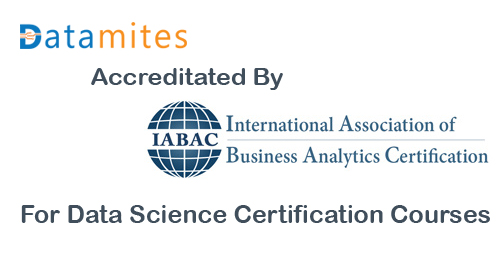

## Important Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')  # setting up background
from scipy import stats

## Data Collection

In [2]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
data.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
data.tail(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


## DOMAIN ANALYSIS

1.EmpNumber:
An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.

2.Age:
Age of employee in years

3.Gender:
Gender of employee [Male/Feamale]

4.EducationBackground:
This will be a high school diploma or a post-secondary degree of a employee

5.MaritalStatus:
Civil status, or marital status, are the distinct options that describe a person's relationship with a significant other

6.EmpDepartment:
Department specifice of employee

7.EmpJobRole:
Job role means the key responsibility of a job profile or job position.

8.BusinessTravelFrequency:
The employee travel for comapny buisness purpose.

9.DistanceFromHome:
Distance between home to company of employee.

10.EmpEducationLevel:
Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.

11.EmpEnvironmentSatisfaction:
satisfied or content employees are with elements like their jobs, their employee experience, and the organizations they work for.

12.EmpHourlyRate:
Hourly Rate means the amount paid to an employee for each hour worked.

13.EmpJobInvolvement:
Job involvement refers to a state of psychological identification with work—or the degree to which a job is central to a person's identity. From an organizational perspective, it has been regarded as the key to unlocking employee motivation and increasing productivity.

14.EmpJobLevel:
Job levels, also known as job grades and classifications, set the responsibility level and expectations.

15.EmpJobSatisfaction:
level of contentment employees feel with their job.

16.NumCompaniesWorked:
employee work in how many companies.

17.OverTime:
employee work overtime or not. [Yes, No]

18.EmpLastSalaryHikePercent:
salary hike percent of employye in last year.

19.EmpRelationshipSatisfaction:
Healthy relationships may motivate employees and increase morale. When employees cast aside relationship issues, they can focus on work tasks more effectively.

20.TotalWorkExperienceInYears:
Total experiance of employee in years.

21.TrainingTimesLastYear:
Total training done by employee in last year.

22.EmpWorkLifeBalance:
“Work-life balance” typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

23.ExperienceYearsAtThisCompany:
Total no of eaxperiance at current company.

24.ExperienceYearsInCurrentRole:
Total no of experiance in current job role.

25.YearsSinceLastPromotion:
Total no of year since last promotion of employee.

26.YearsWithCurrManager:
Employee total no of years with current manager.

27.Attrition:
Employee attrition is the naturally occurring, voluntary departure of employees from a company. Employee attrition involves leaving a job for: Personal reasons. Professional motivation.

28.PerformanceRating:
This is a target feature, tell that the total rating of employee performance in company.

## Basic checks

In [6]:
data.shape

(1200, 28)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [8]:
data.describe()#Statistical Summary

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [9]:
data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [10]:
print(data.columns.tolist())#All columns

['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'PerformanceRating']


In [11]:
data.isnull().sum().sort_values(ascending=False)#Mising value

EmpNumber                       0
Age                             0
Attrition                       0
YearsWithCurrManager            0
YearsSinceLastPromotion         0
ExperienceYearsInCurrentRole    0
ExperienceYearsAtThisCompany    0
EmpWorkLifeBalance              0
TrainingTimesLastYear           0
TotalWorkExperienceInYears      0
EmpRelationshipSatisfaction     0
EmpLastSalaryHikePercent        0
OverTime                        0
NumCompaniesWorked              0
EmpJobSatisfaction              0
EmpJobLevel                     0
EmpJobInvolvement               0
EmpHourlyRate                   0
EmpEnvironmentSatisfaction      0
EmpEducationLevel               0
DistanceFromHome                0
BusinessTravelFrequency         0
EmpJobRole                      0
EmpDepartment                   0
MaritalStatus                   0
EducationBackground             0
Gender                          0
PerformanceRating               0
dtype: int64

## UNIVARIATE ANALYSIS

### PLOTS USED:
continuous features

* histogram: A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the         horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column.
* lineplots:A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the     frequency of each value.

* Discrete and Categorical Countplot: countplot is used to Show the counts of observations in each categorical bin using bars.

### 1.Age

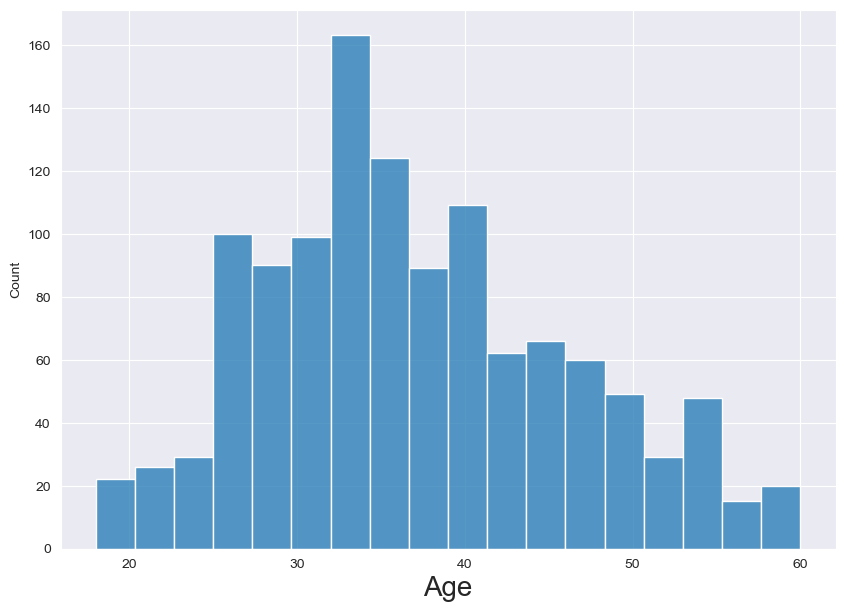

In [12]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=data)
plt.xlabel('Age',fontsize=20)
plt.show()

### Observation:
* The range of age between 18 to 60, most of the employee age between 25 to 40.

### 2.Employee Hourly Rate

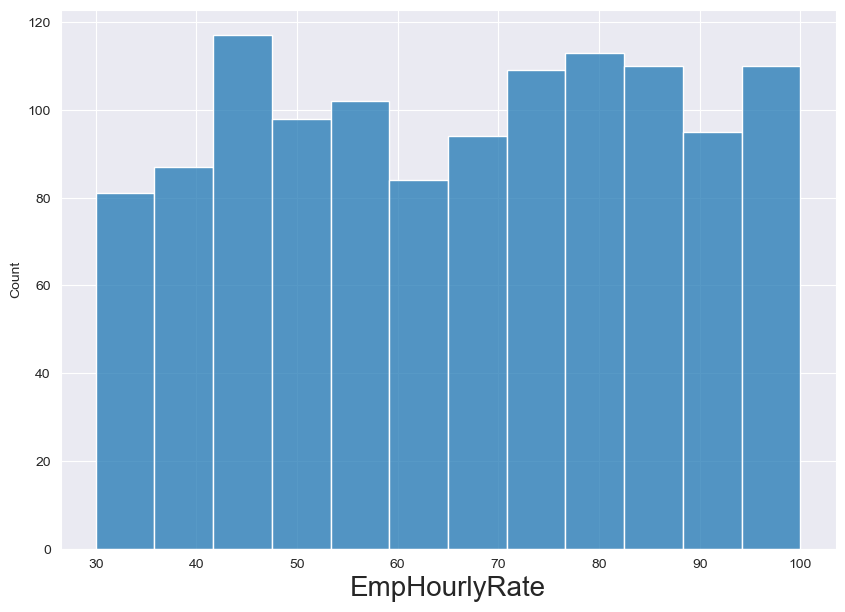

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(x='EmpHourlyRate',data=data)
plt.xlabel('EmpHourlyRate',fontsize=20)
plt.show()

### Observation: 
* The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

### 3.Total Work Experience In Year

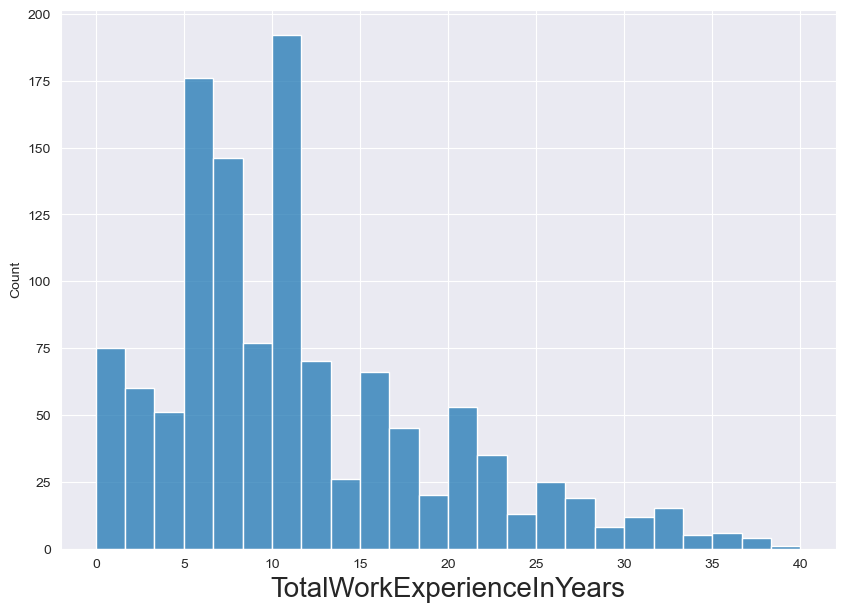

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(x='TotalWorkExperienceInYears',data=data)
plt.xlabel('TotalWorkExperienceInYears',fontsize=20)
plt.show()

### Observation: 
* Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

### 4.Experience Years At This Company

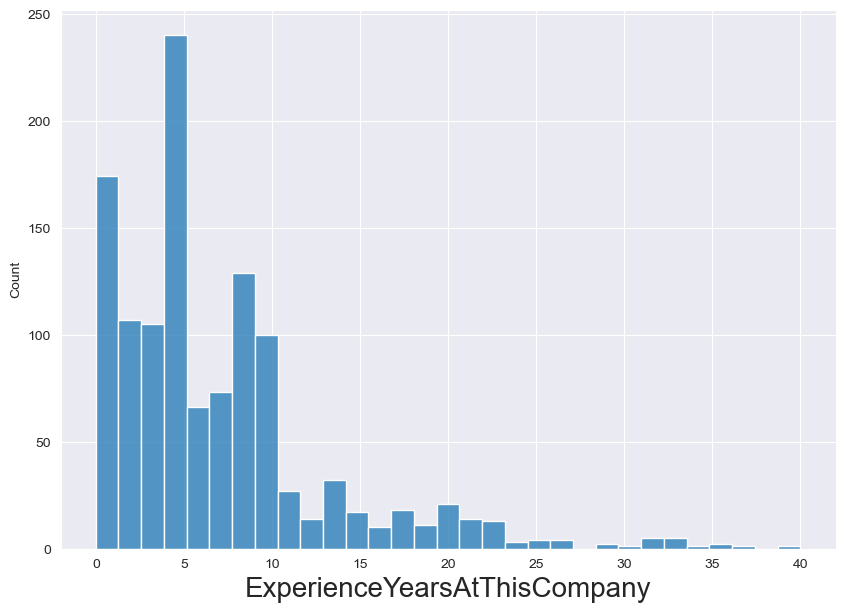

In [15]:
plt.figure(figsize=(10,7))
sns.histplot(x='ExperienceYearsAtThisCompany',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=20)
plt.show()

### Observation: 
The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.

## USE SUBPLOT TO PLOTS MULTIPLE FEATURE

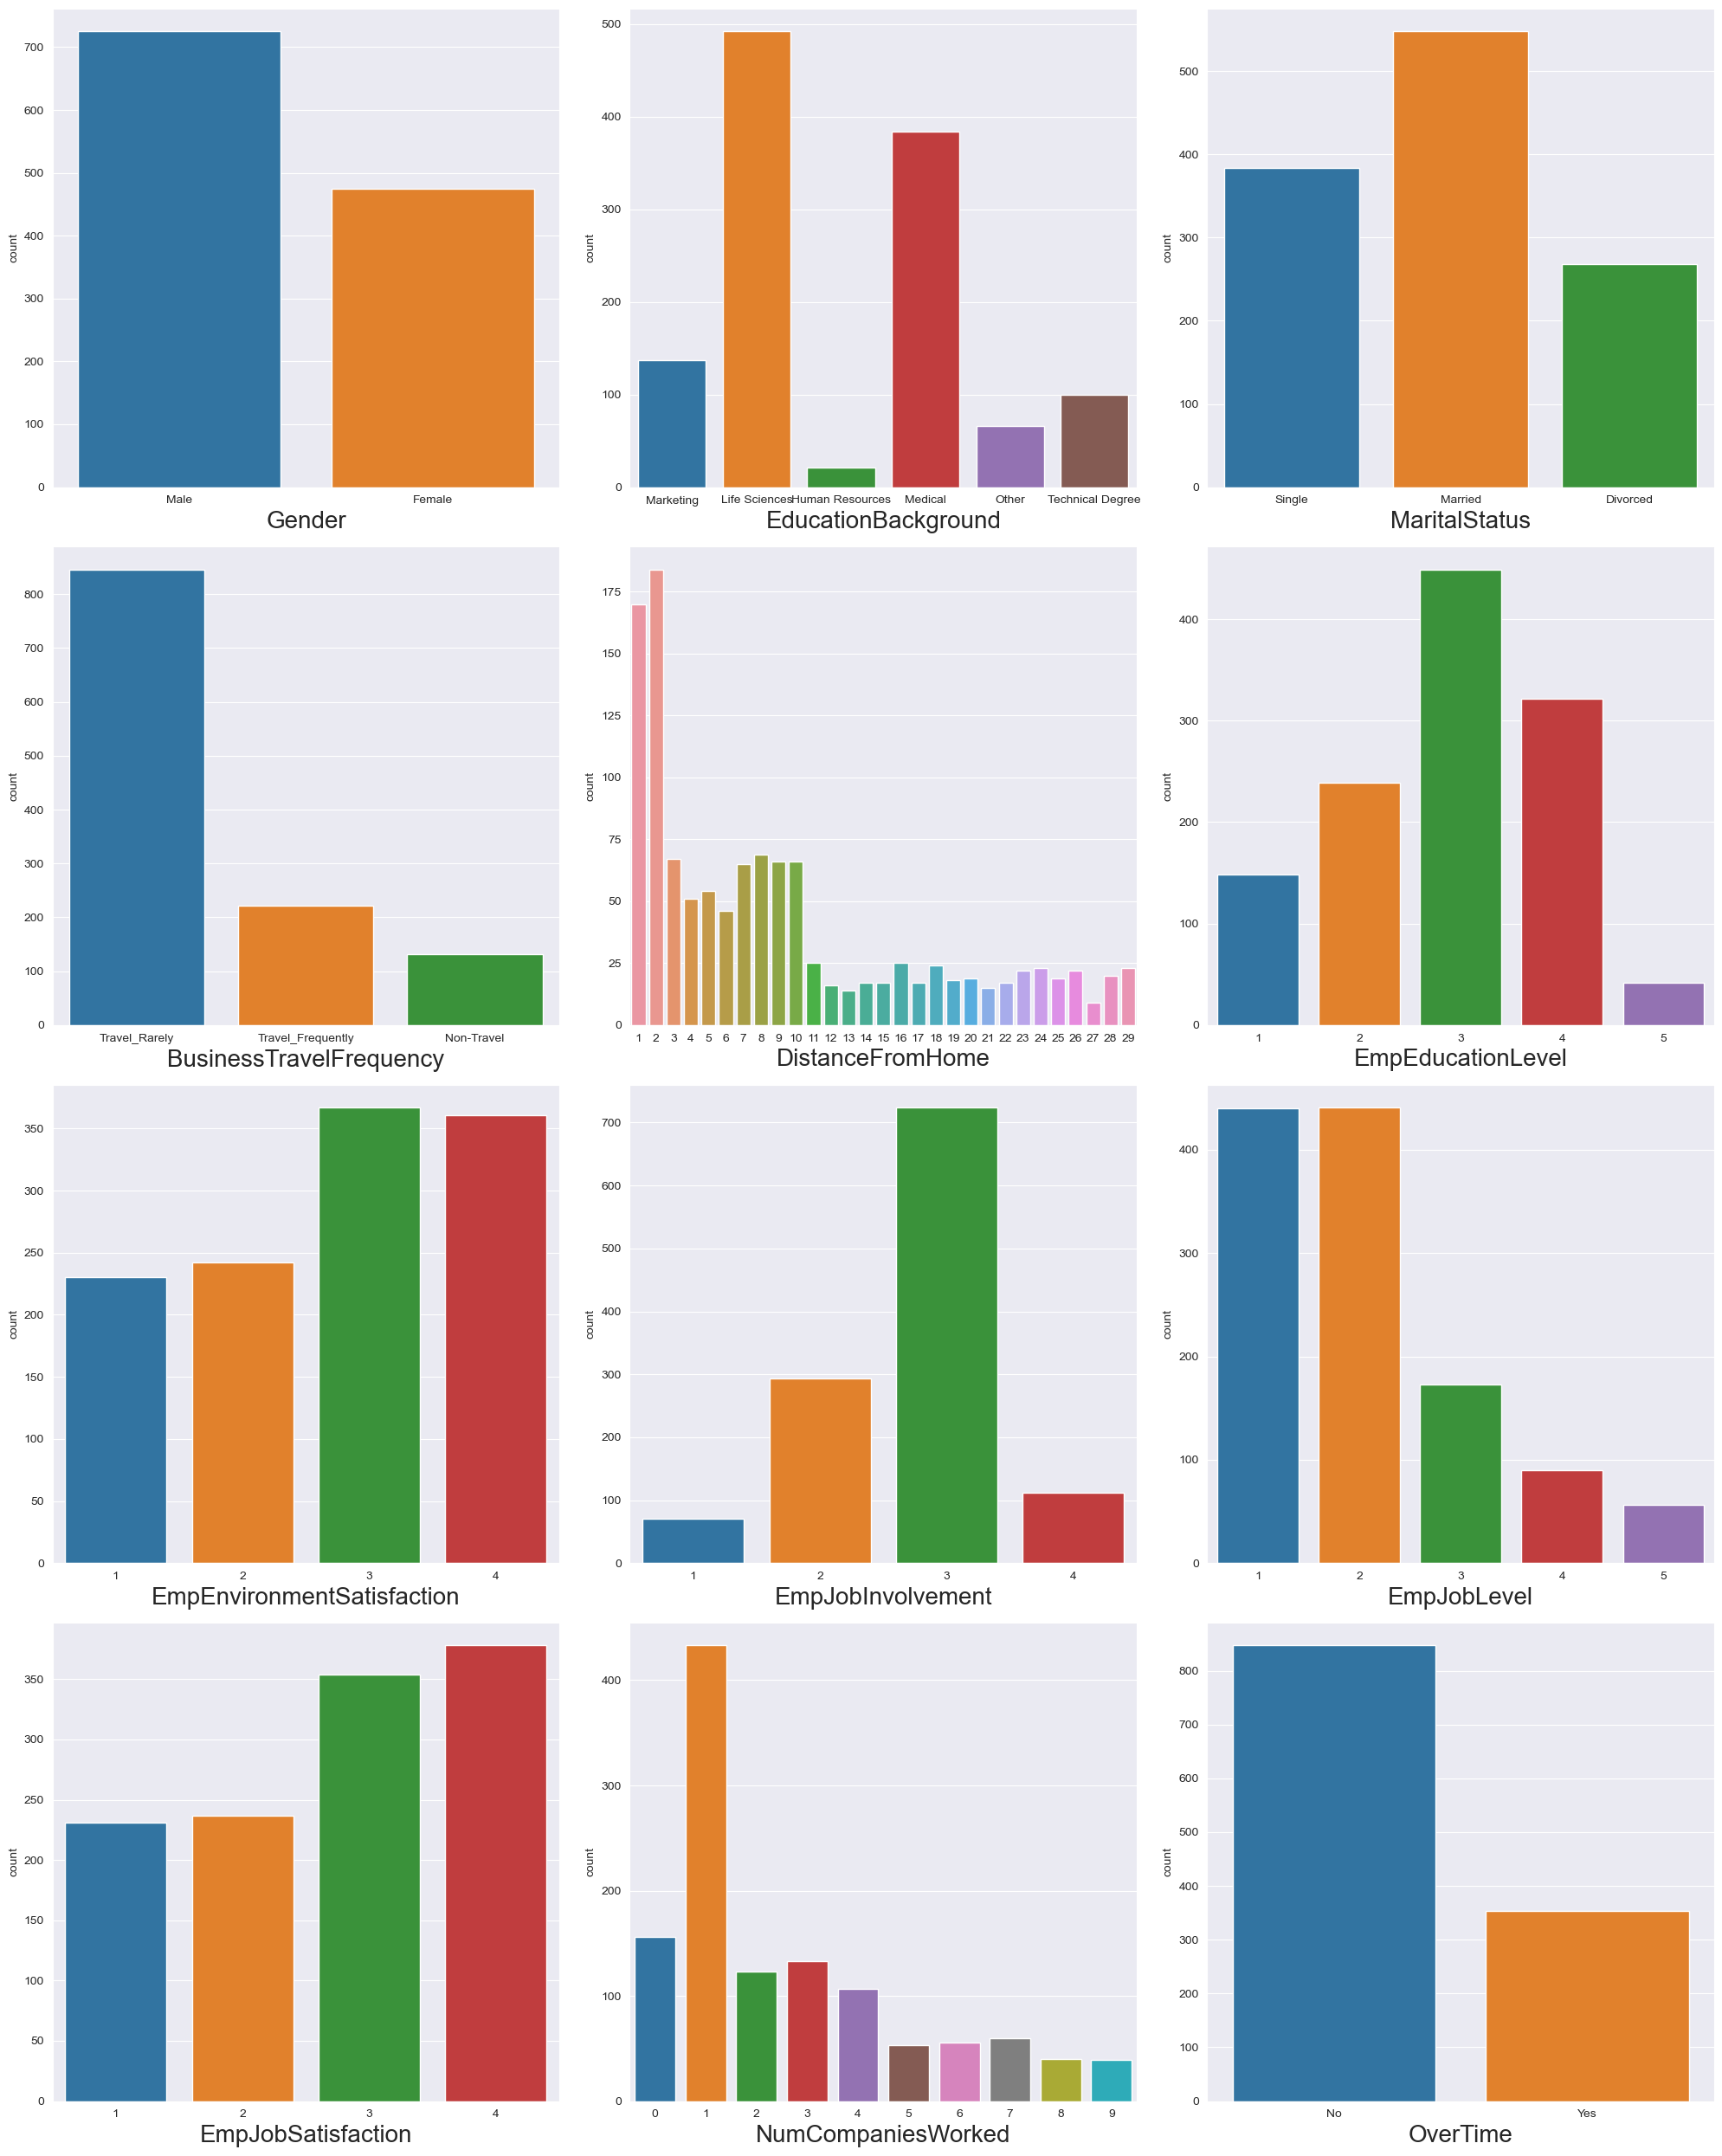

In [16]:
count = data[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in count: # iteration of columns / acessing the columns from count 
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### Observation:

### 5.Gender:
* Most of the male present in the comapany

### 6.Education Background:
* most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100

### 7.MaritalStatus:
* Most of the employee is married as well as less than 400 employee is single.
  less than 300 employee mariatal status is divorced.

### 8.Business Travel Frequency:
* Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently
  remaining less than 120 employee not travell for buisness purpose.

### 9.Distance From Home:
* The range of distance between home to comapny is 1 to 29.
  Maximum no of employee home to company distance is less than 10.

### 10.Educational Level:
* Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4.
  2 education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.

### 11.Employee Environment Satisfaction:
* Most of the employee Statisfaction is 3 & 4
  1 & 2 enviroment satisfaction employee less than 250

### 12.Employee Job Involvement:
* Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
  Remaining 1 and 4 job involvment employee is less than 100.

### 13.Employee Job Level:
* The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
  Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

### 14.Employee Job Satisfaction:
* Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.

### 15.Number Companies Worked:
* Maximum no of employee work with only one company.
  less no of employee work in more than 5 companies.

### 16.Overtime:
* Most no of employee on doing over time and less than 350 employee doing overtime in company.

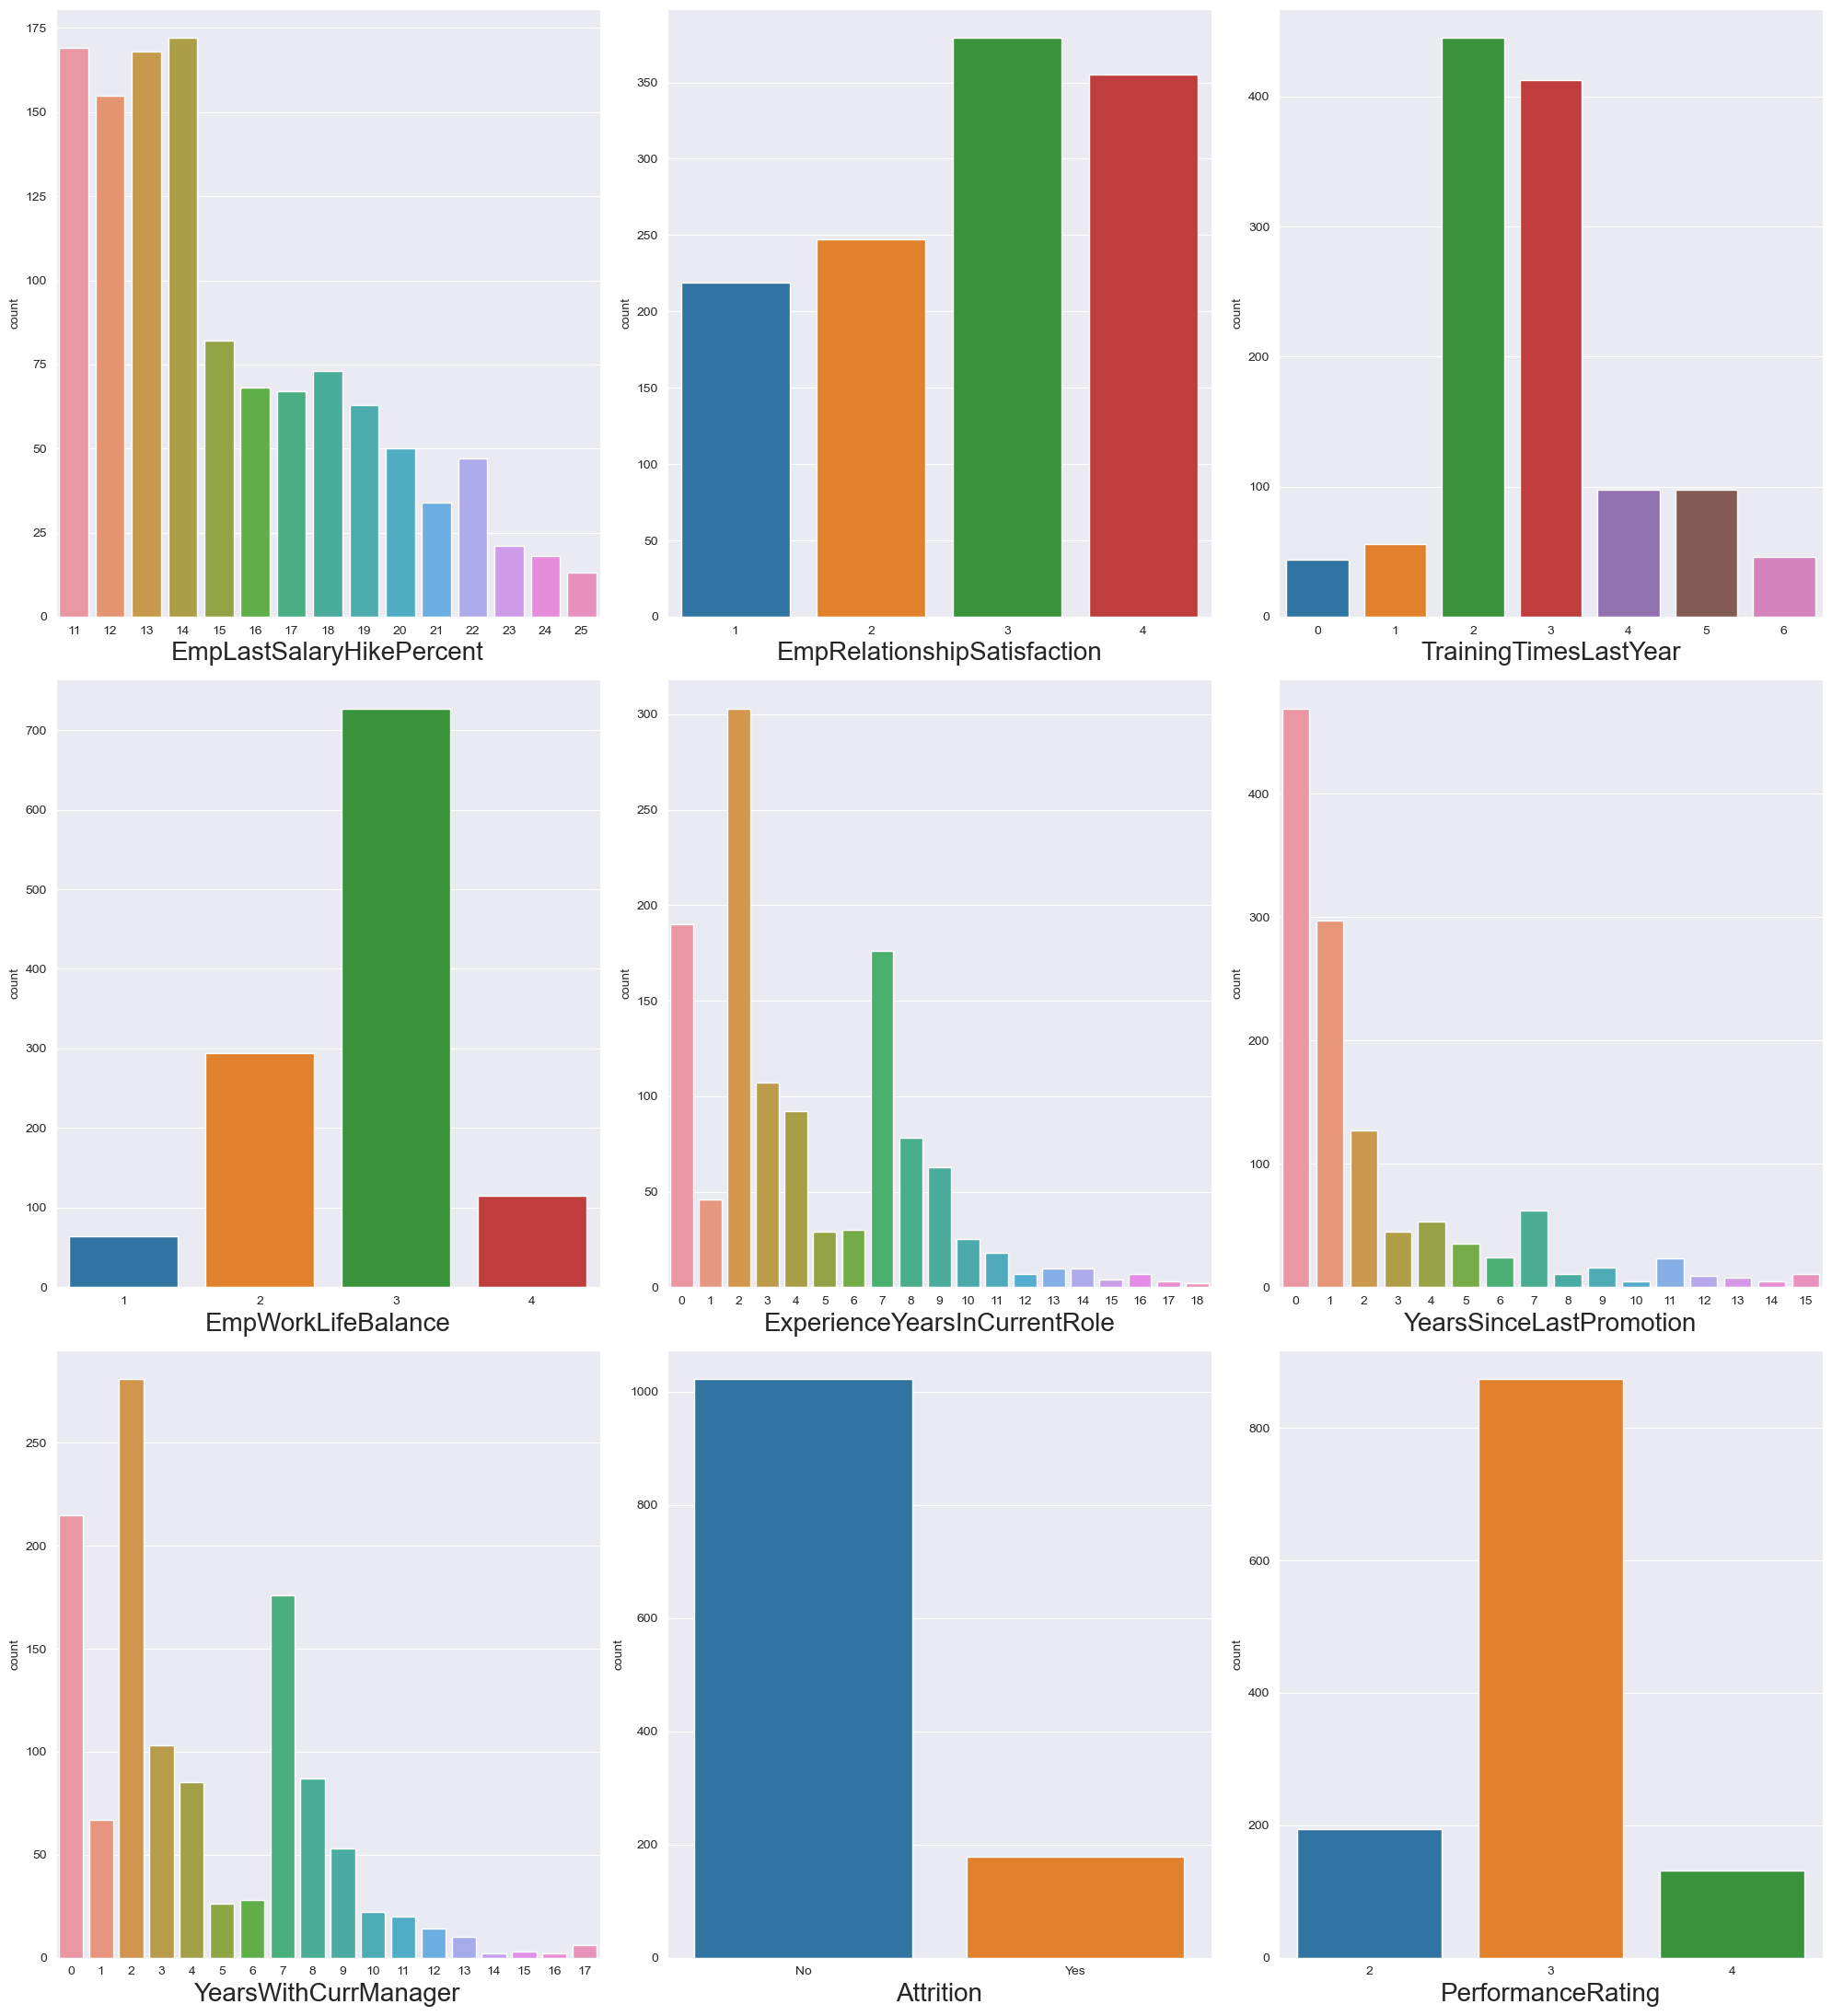

In [17]:
count2 = data[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']]  #Making nex feature list to plot the graph

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in count2: # iteration of columns / acessing the columns from count 
    if plotno<=10:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count2[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### Observation:

### 17.Employee Last Salary Hike Percent:
* Most no of employee salary hike percentage between 11 to 14%.total range of salary hike is 11 to 25.
  less than 80 employee last salary hike in between 15 to 19.

### 18.Employee Relationship Satisfaction:
* The range of employee relationship satisfaction is 1 to 4,Most of the relation satisfaction is 3 & 4 as well as less than 250   employee with 1 & 2 relationship satisfaction.

### 19.Training Times LastYear:
* The range of training time in last year between 0 to 6, Most of the employee doing 2 & 3 rd time training and remaining all     times is less than 100.

### 20.Employee Work Life Balance:
* Most most the work life balance is 3 than less than 300 employee work life balance is 2.
  Minimum work life balance is 1 as well as less than 100 employee work life balance is 4.

### 21.Experiance In Current Role:
* Maximum current role experiance of employee is 18.
  Most of the employee have 2 years of expriance in current role then 7 year of experiance employee is less than 180
  less than 200 employee have not current role experiance.

### 22.Years Since Last Promotion:
* The range of year since last promotion is 0 to 15.
  Most of the employee has not promoted in last year less than 300 employee has promoted atleast 1 year.

### 23.Years With Current Manager:
* Most employee have 2 years with current manager and minimum 16 years with current manager.
  The range in between 0 to 17 and less than 180 employee has 7 years with current manager.

### 23.Years With Current Manager:
* Most employee have 2 years with current manager and minimum 16 years with current manager.
  The range in between 0 to 17 and less than 180 employee has 7 years with current manager.

### 24.Attrition:
* Maximum no of employee has not leave the company and less than 200 employee has going to leave the company.

### 25. Target Feature == Performance Rating:
* The range of performance rating is 2 to 4, most of the employee have 3 performance ranting and less performance rating is 4.
  less than 200 employee has 2 performance rating.

### 26.Employee Department

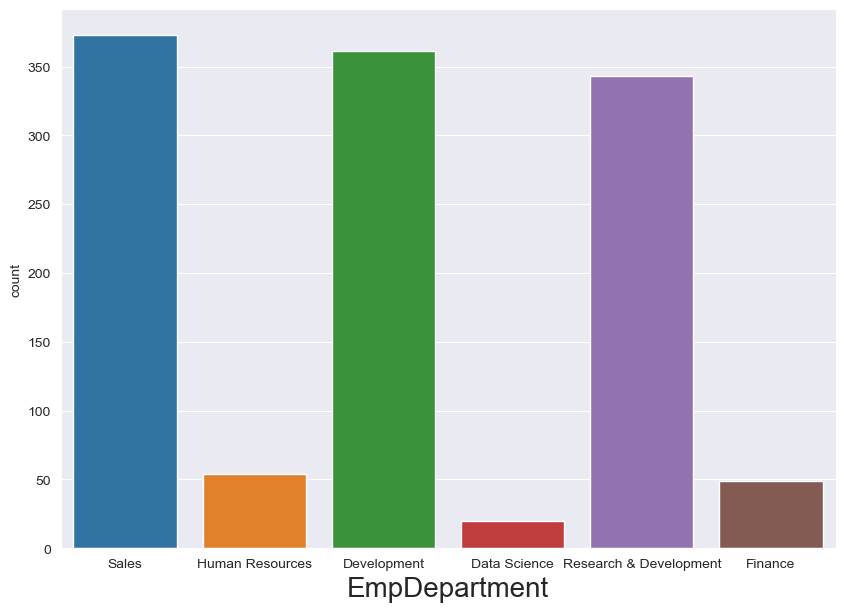

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='EmpDepartment',data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.show()

### Observation:

* Most of the employee from sales department as well as Development and research & Development departmnet employee is less than   320
* Human resources & finance department employee is almost equal.
* Data science employee has minimum in company.

### 27.Employee Job Role

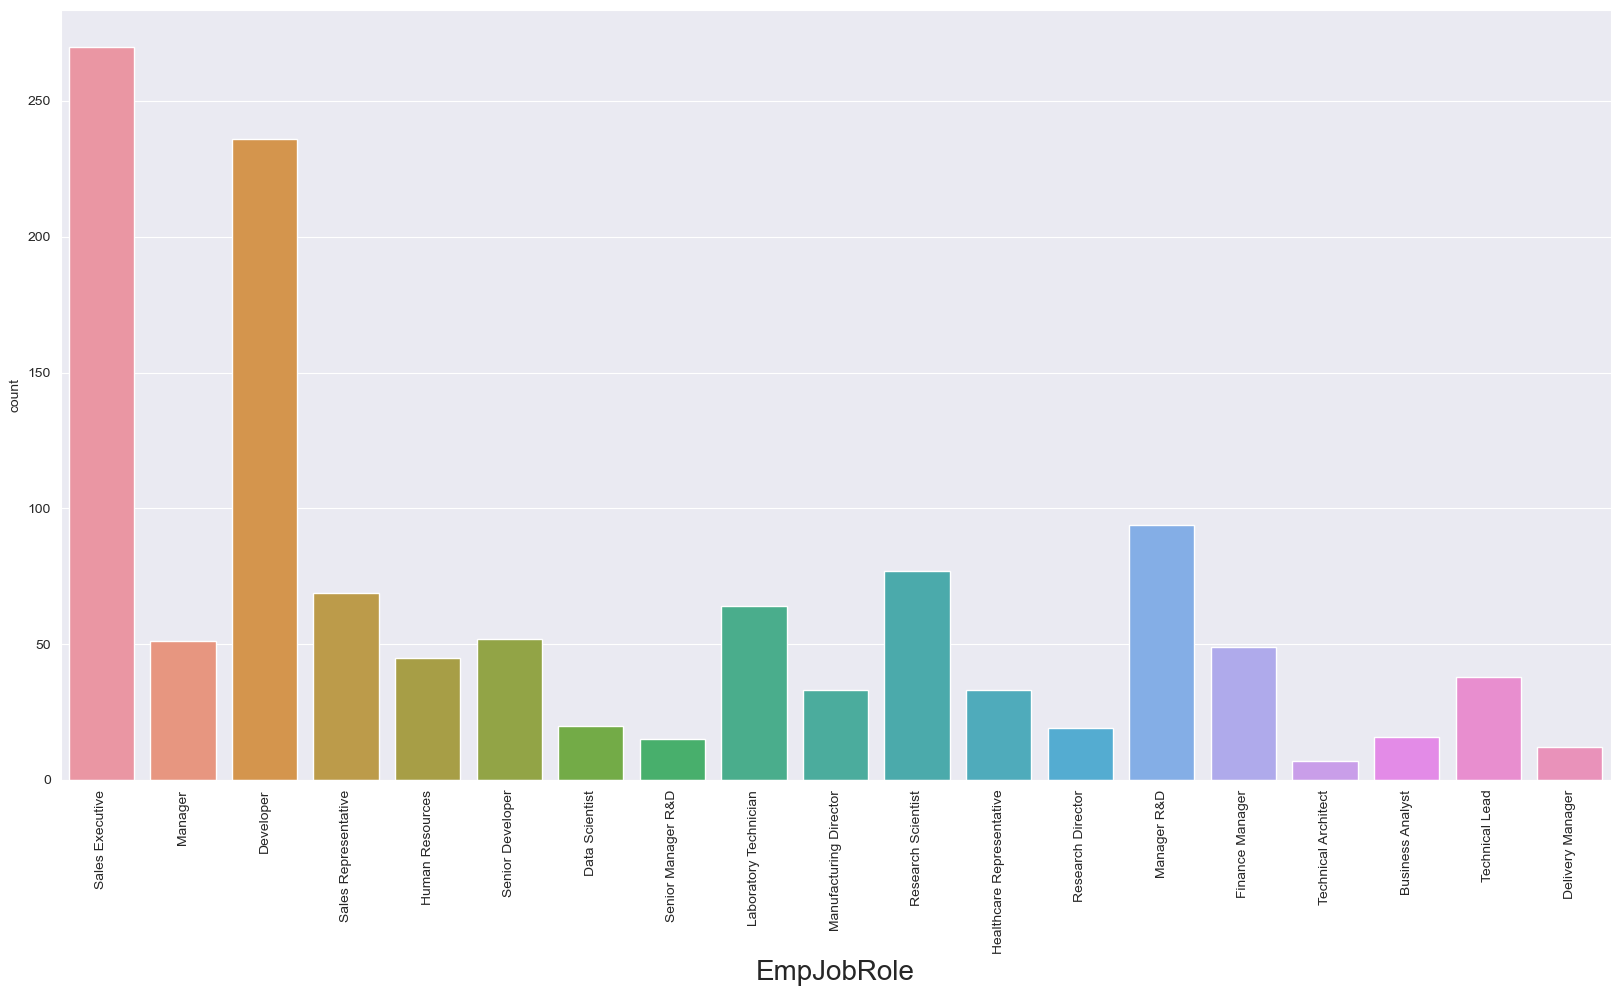

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

### Observation:

* Sales executive employee job role is maximum as well as Developer job role employee count is 230.
* Manage R& D and research scientist employee is less than 100 and remaining all job role employee is less than 65.

## BIAVARIATE ANALYSIS

* In Bivariate analysis Checking the relation between two features

### ANALYSIS ON CONTINUOUS FEATURE

### PLOT USED:
* Histogram, line plot used for continuous features
* Count used for categorical & Discrete data.

### 1.Relation Between age & Experience Years At This Company

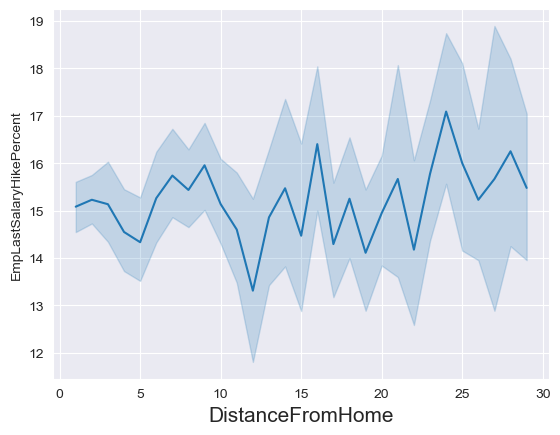

In [20]:
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()

### Observation:

* If the distance from home is more then the employee salary hike is slightly increases.
* distance from home between 10 to 13 that time employee salary hike is decreases.

### ANALYSIS ON CATEGORICAL AND DISCERETE FEATURE

### CREATE A NEW DATAFRAME FOR CATEGORICAL FEATURES.

In [21]:
categorical = []  # Create empty list to store the feature
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


In [22]:
categorical  # All categorical features 

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

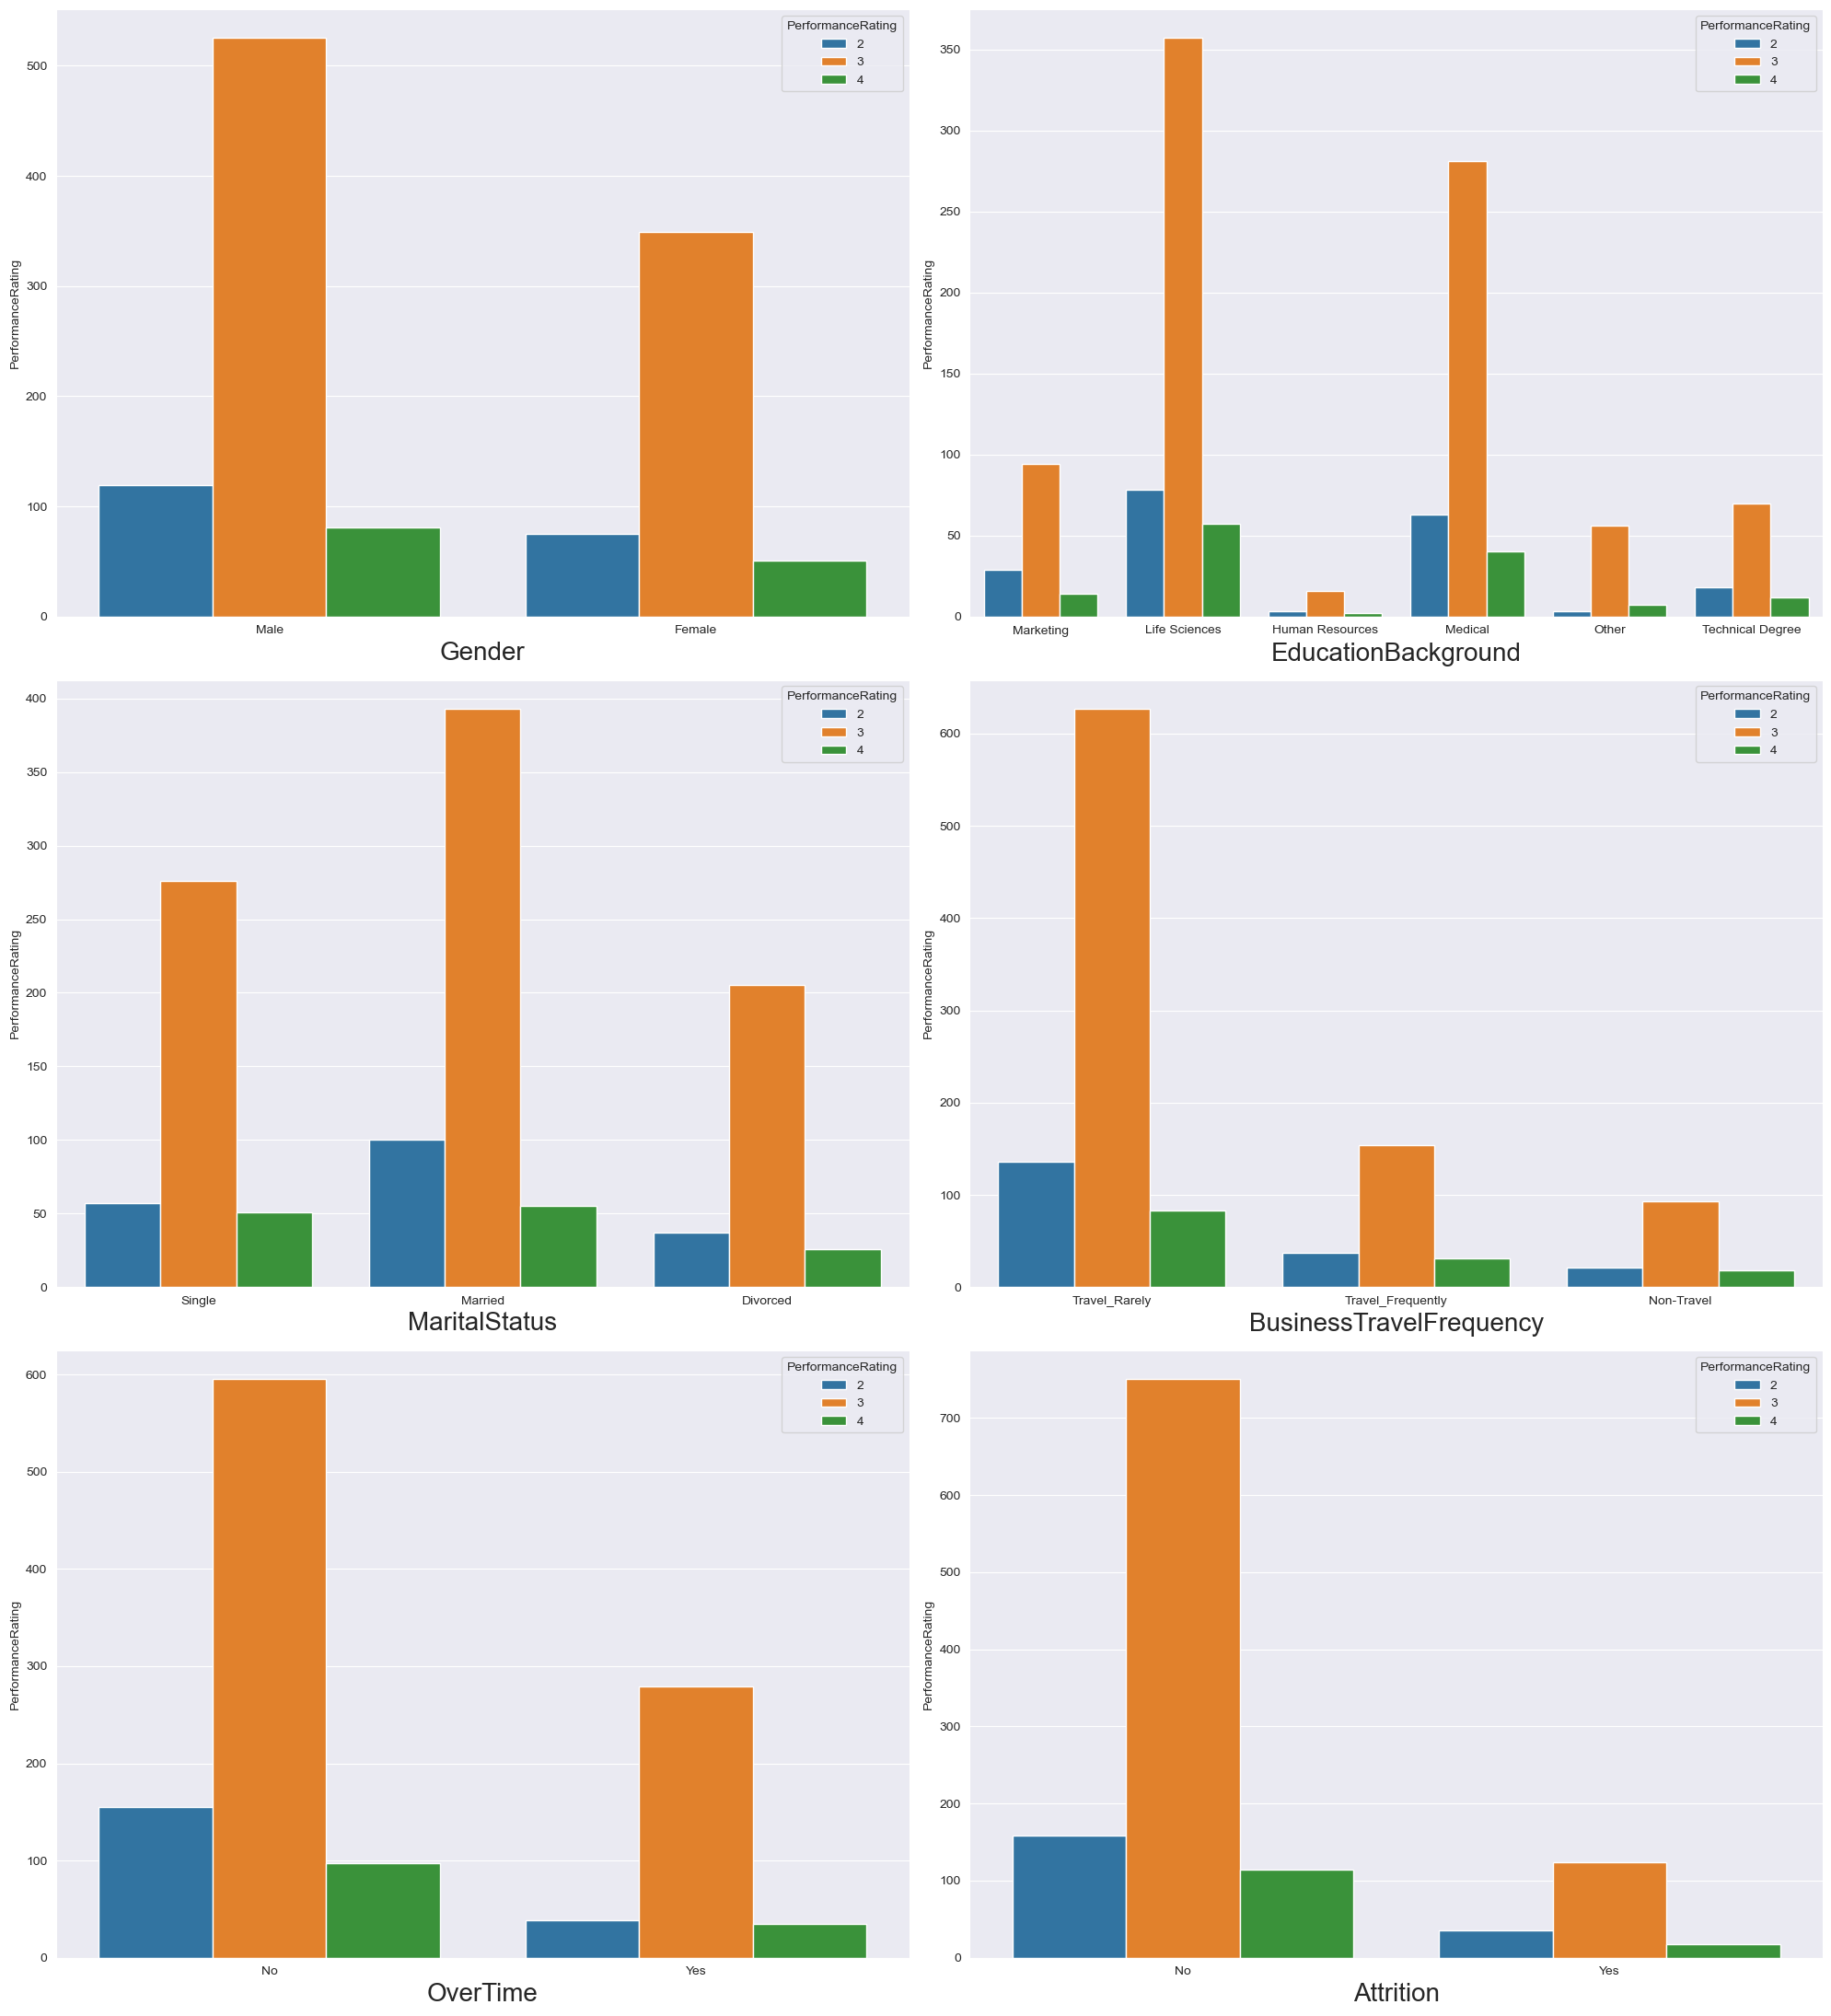

In [23]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

Observations:

### 7. Relationship between Gender and performance rating
* Maximum no of male rated with 3 performance rating as well as in female also most of the feamle rated with 3 performance rating.
* four performance rating in both male & female is less

### 8.Relationship between EducationBackground and performance rating
* Maximum life sciences and medical education background employee rated with 3 performance rating
* life science and medical education background employee also rated with 2 & 4 performance rating most of the time

### 9.Relationship between MaritalStatus and performance rating
* Most of the married employee rated with 3 performance rating as well as single and divorced marital status employee rated with 3 performance rating most of the time.
* In married marital status 2 performance rating emplyee is more than single or divorced.

### 10.Relationship between Business Travel Frequency and performance rating
* Maximum no of travel rarely employee has get 3 performance rating
* Those employee travel frequentaly this employee also rated with 2, 3, and 4

### 11.Relationship between Overtime and performance rating
* Maximum no of employee with no overtime has rated with 3 perfomance rating
* Those employee doing overtime that time 2 & 4 performance rating is constant.

### 12.Relationship between Attrition and performance rating
* Most of the employee rated with 3 performance rating in no means(They are not leave the company)
* Those employee have 3 performace rating those also leave the company

### 13.Relationship between employee department and performance rating

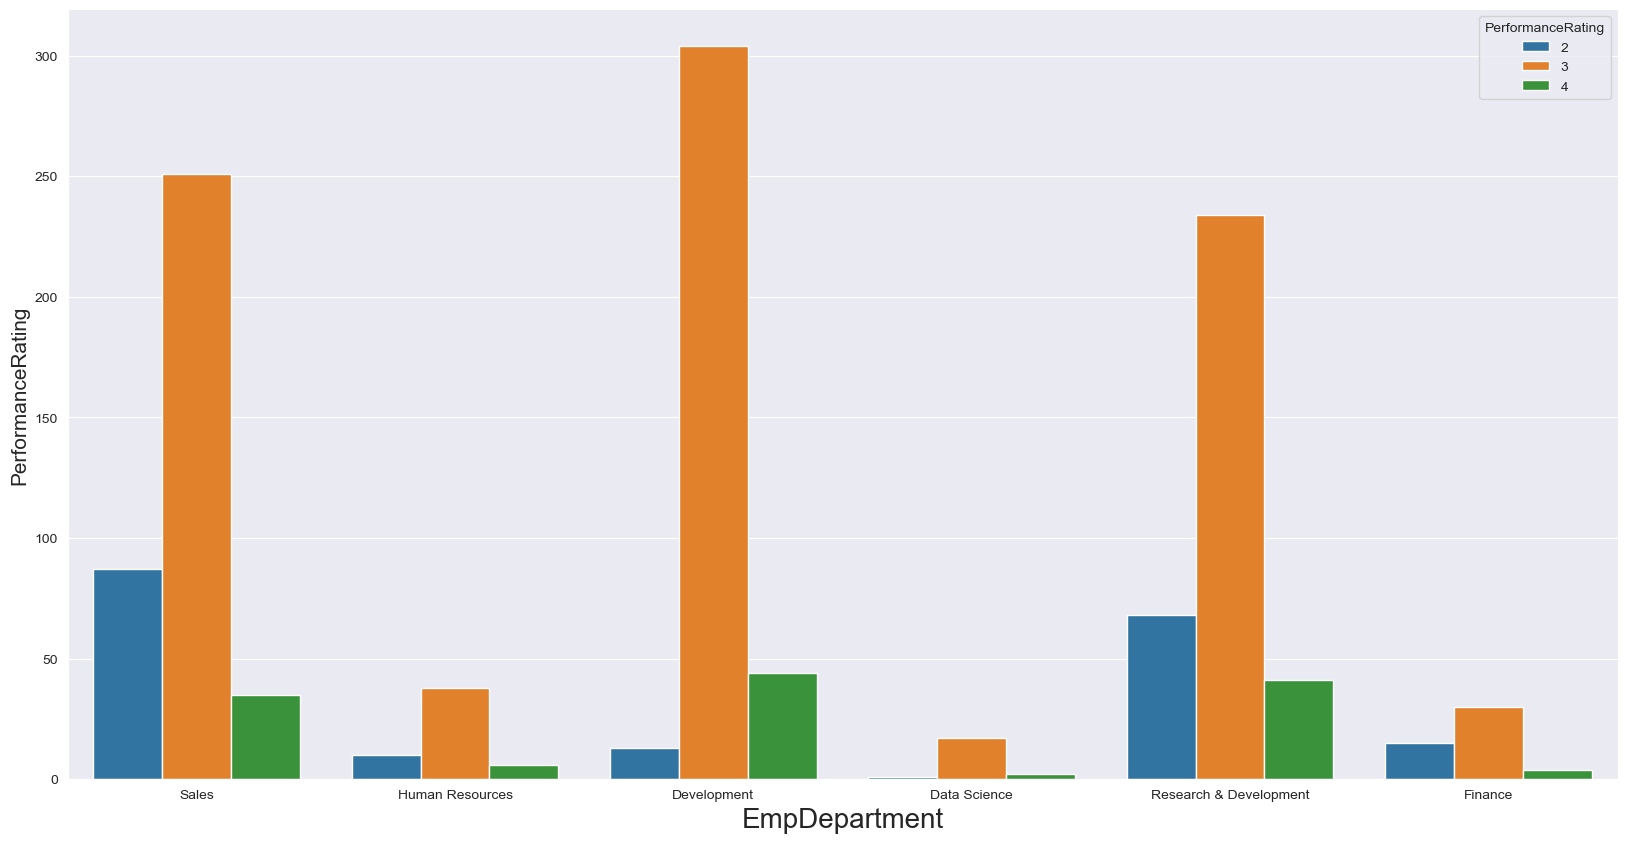

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

### Observation:

* Most of the Development, Sales, And Research and development employee department has 3 peformance rating
* Data science department employee has low performance rating.
* In sales & Research and development department also 2 performance rating employee avilable most of the time.

### 14.Relationship between employee job role and performance rating

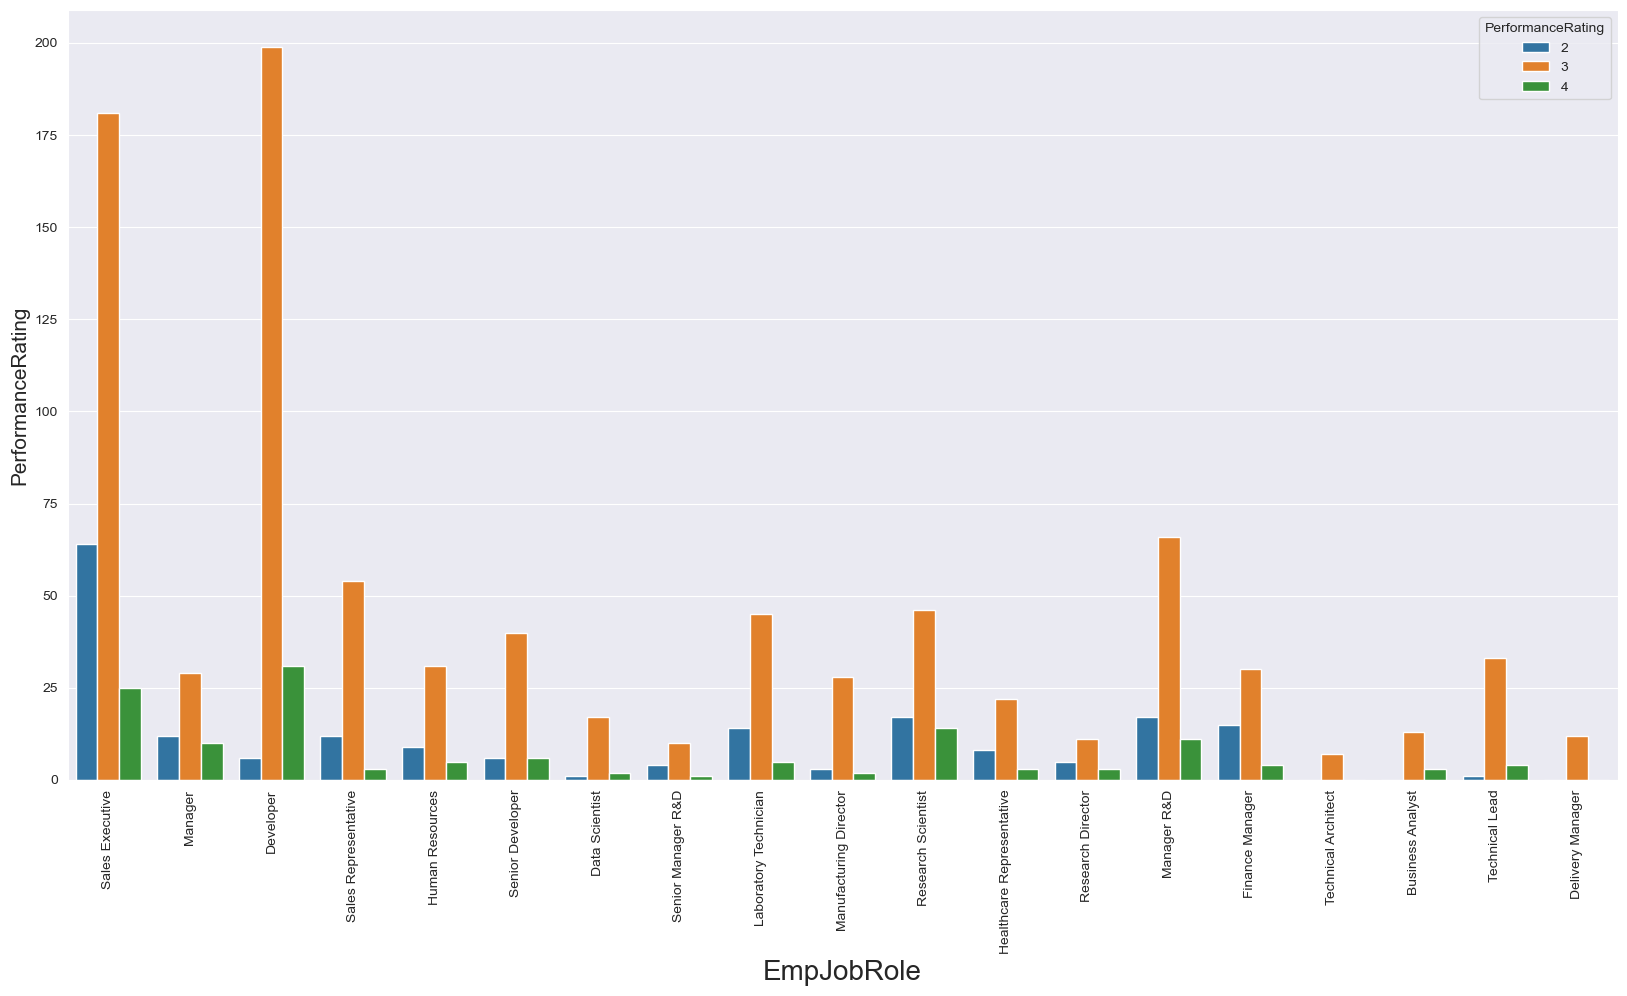

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',hue=data.PerformanceRating,data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

### Observation:

* Developers and sales executive job role employee performance rating is 3 most of the time.
* In technical architecture and delivery manger job role employee not rated with 2 & 4 performance rating.
* In sales excutive alsso less than 60 employee rated with 2 performance rating.
* Remaining all job role employee has 3 performance rating most of the time.

### CREATE NEW DATAFRMAE FOR NUMERICAL FEATURES:

In [26]:
numerical_col = []
for column in data.columns:
    if data[column].dtype == "int64":
        data[column].unique()   # for continuos features we use unique>=10
        numerical_col.append(column)

In [27]:
numerical_col  # All numerical features

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

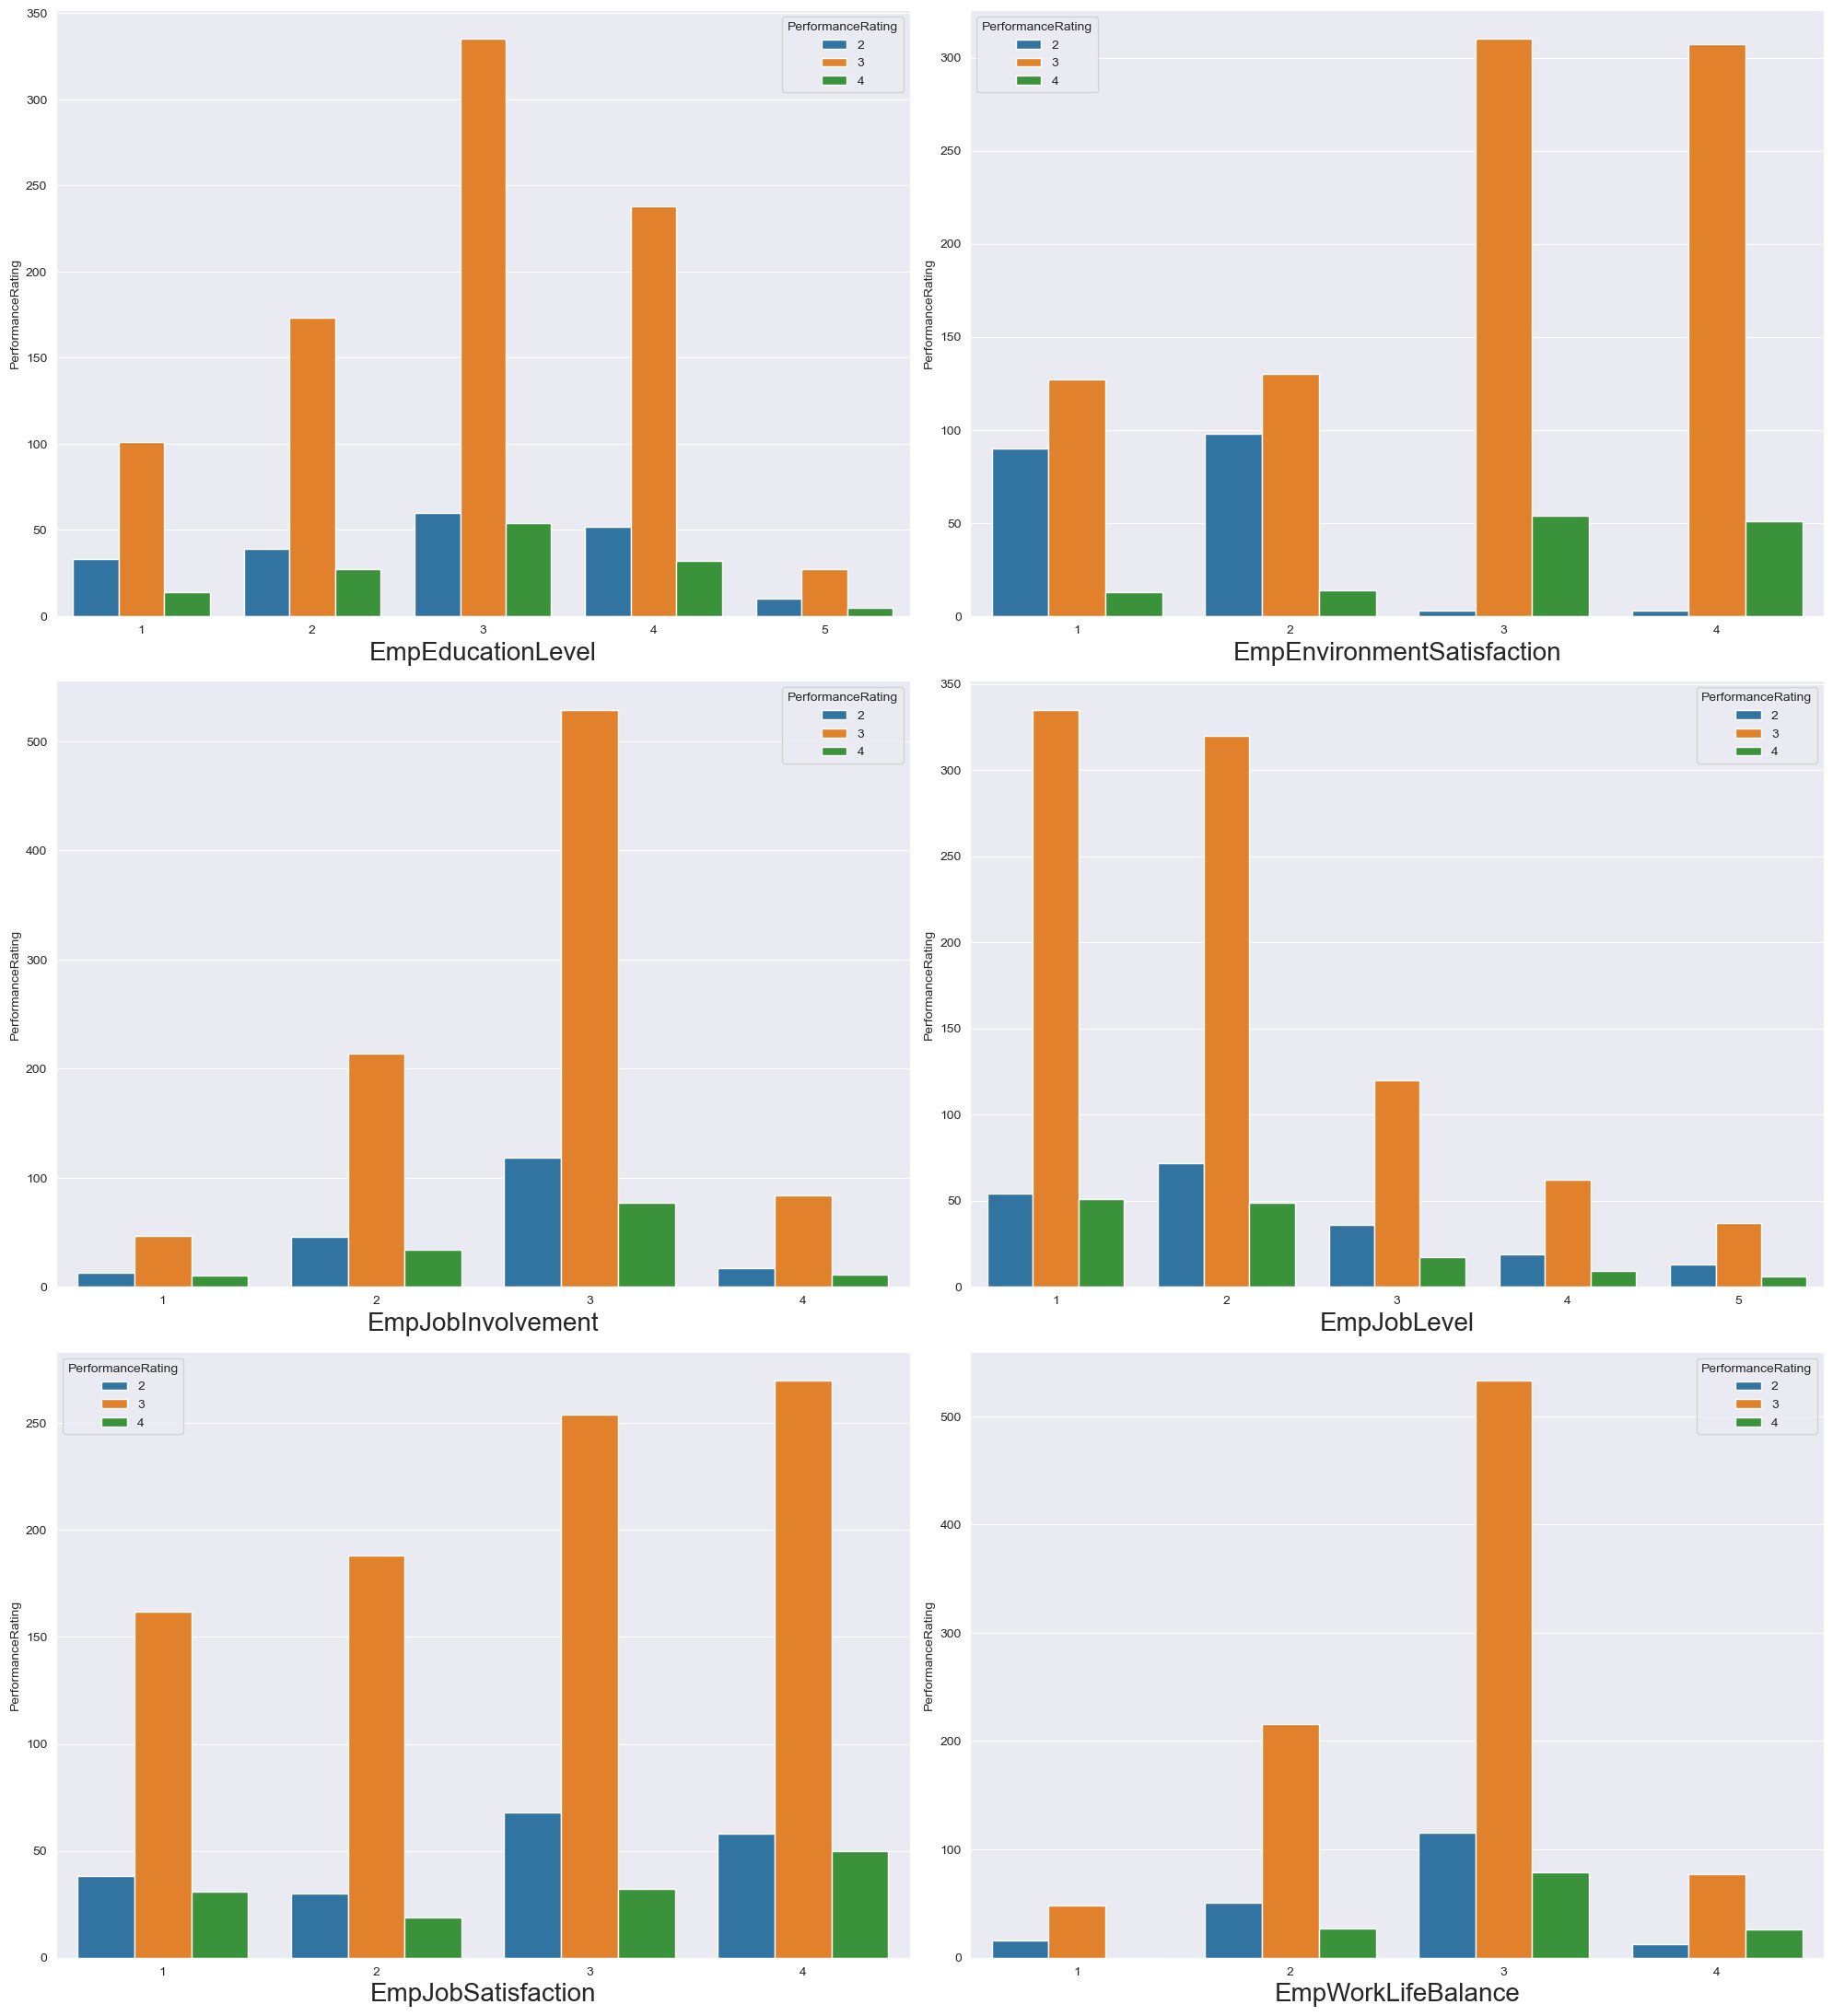

In [28]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=numerical[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### Observations:

### 15. Relationship between EmpEducationLevel and performance rating
* Those employee education level is [3,4 & 2] this employee have 3 peformance rating mostly
* If the performance rating is 2 & 4 then all eduaction level employee is less than 60.

### 16. Relationship between EmpEnvironmentSatisfaction and performance rating
* Maximum no of employee enviorment statifaction is 3 and 4 with 3 performance rating.
* If the employee enviorment satisfaction is 1 & 2 that time the maximum employee have 2 performace rating.
* If the employee enviorment satisfaction is increases that time 4 performance rating also increases.

### 17. Relationship between EmpJobInvolvement and performance rating
* Those employee job involvement is 2 & 3 this empluee have 3 performance rating mostly
* 2 & 4 performance rating eployee is less in all job involvment.

### 18. Relationship between EmpJobLevel and performance rating
* If the employee job level is 1,2 & 3 that time most of the employee have 3 performance rating
* In all job levels 2 & 4 performance rating of all emplyee is less than 60.

### 19. Relationship between EmpJobSatisfaction and performance rating
* Maximum 4 & 3 job satisfaction employee get 3 performance rating most of the time.
* In all job satisfaction 2 & 4 performance rating is less than 55 employee

### 21. Relationship between EmpWorkLifeBalance and performance rating
* If the employee work life balance is 3 that time maximum no of employee have 3 performance rating.
* If the work life balance is 1 that time no one get 4 performance rating.

## MULTIVARIATE ANALYSIS

* Checking the relationship between two features with respect to target features

### PLOT USED:

### Line plot: 
* A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

### Barplot: 
It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

### 1.Check the relationship between Age & Total work experiance with respect to target feature

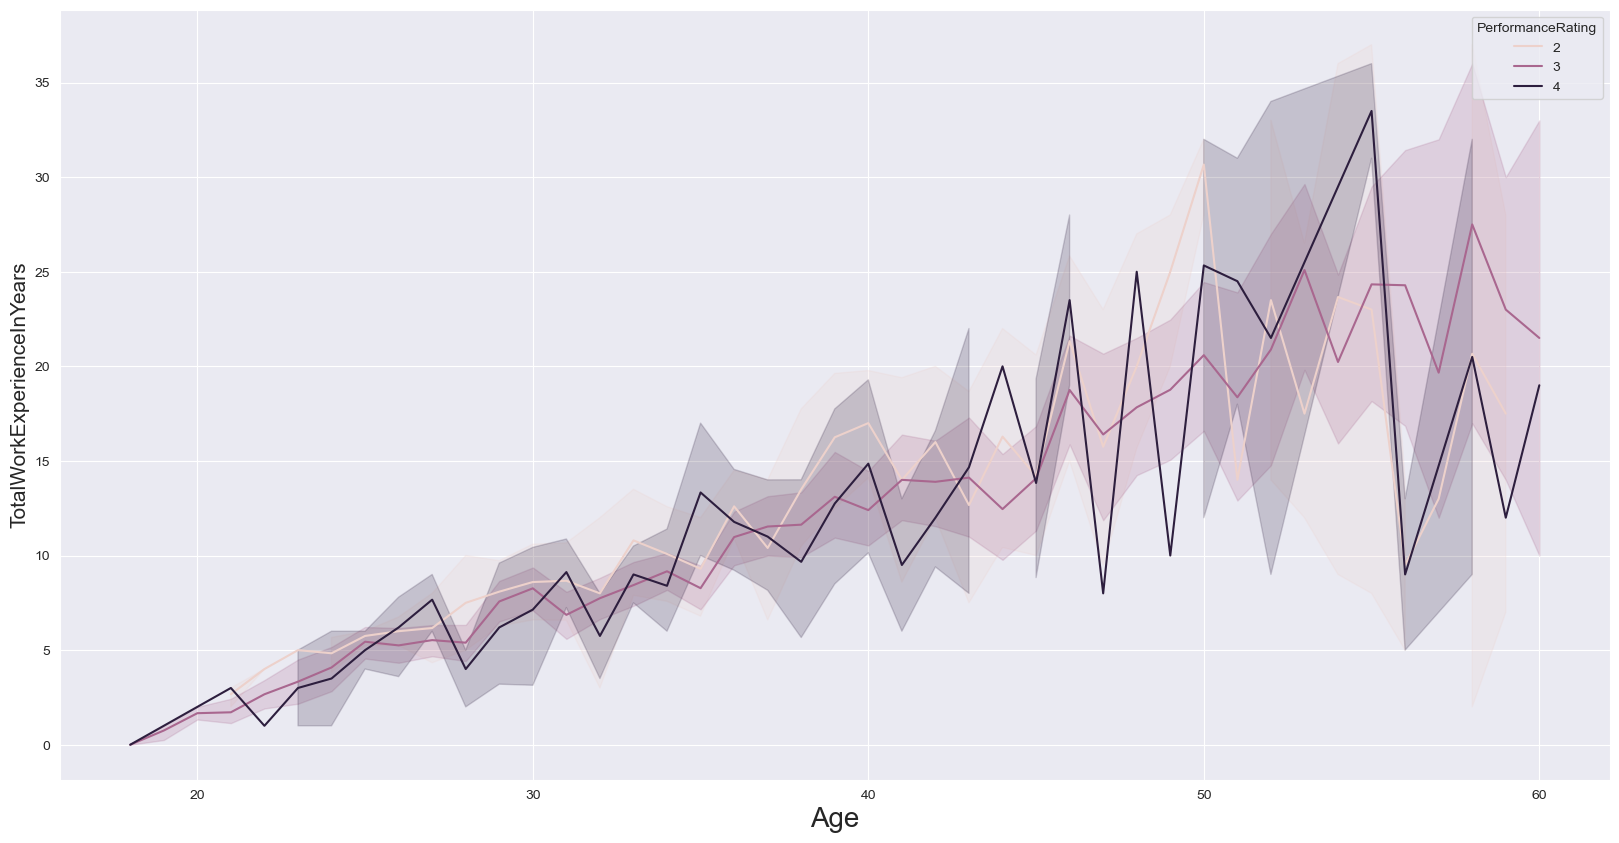

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating,data=data)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

### Observation:

* If the age & total experiance is increases that time most of the employee performance rating is 4.
* Low age and minimum year experiance employee also 4 perfomace rating.
* At the age of 50 and 30 years of experiance employee have 2 performance rating.

### 2.Check the relationship between Gender & Number Companies Worked with respect to target feature

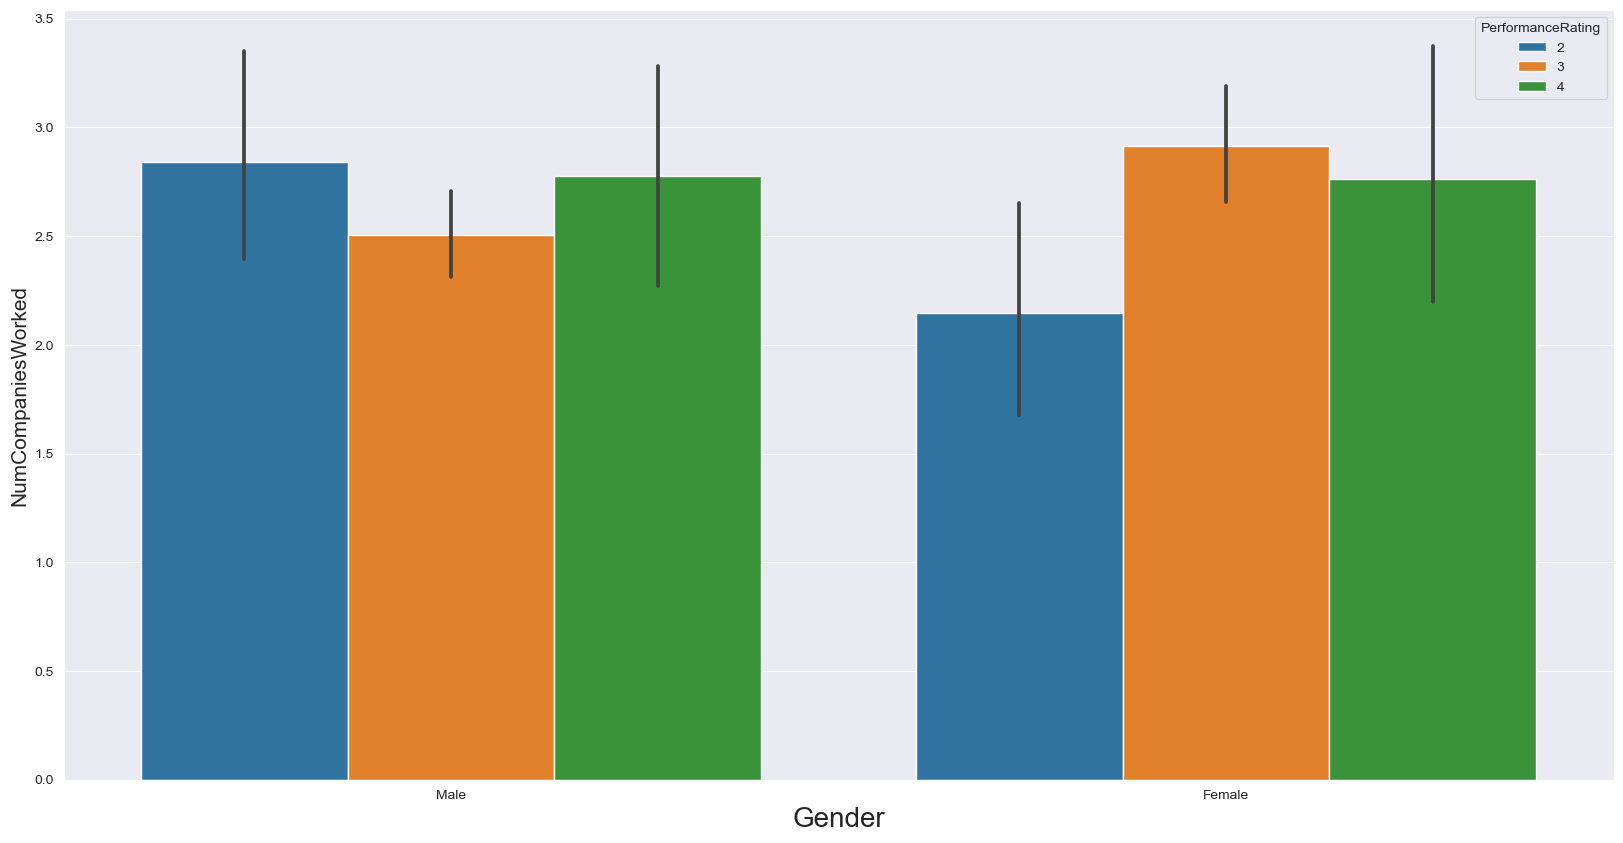

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

### Observation:

* If the gender is male and no of companies work is increses that time most of the performance rating is 2 & 4.
* If female work in less no companies that time performance rating is 2.
* 3 & 4 performance rating in female increase if the no of compaines worked is increses.

### 3.Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

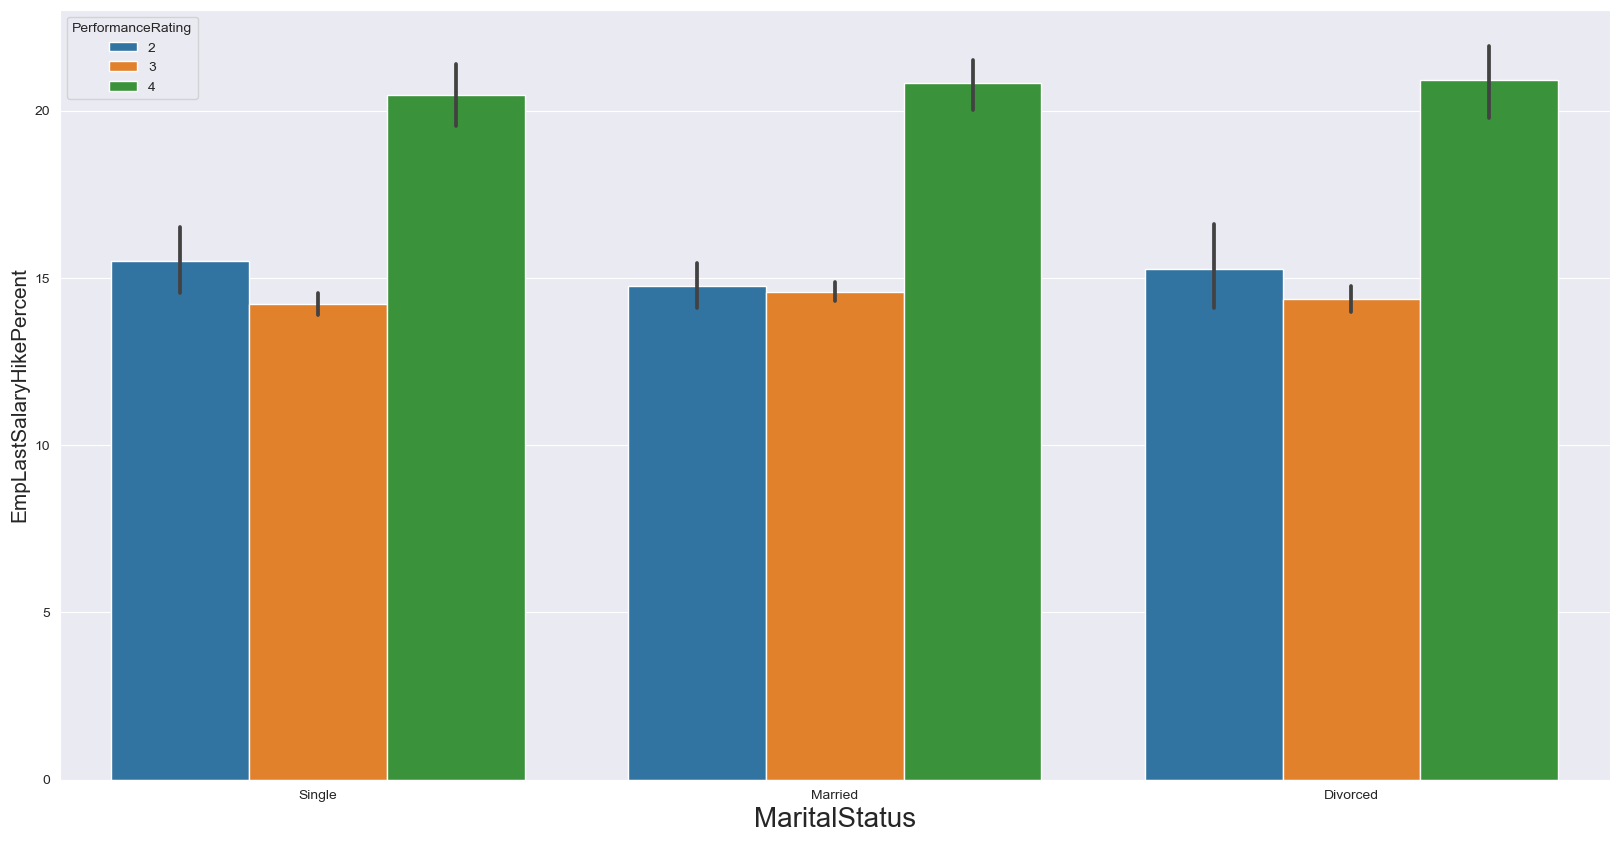

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

### Observation:

* In all marital status with maximum salary hike percent in last year is increases that time performance rating is 4.
* If salary hike percentage in last year is less than 15 that time performance rating is 2 & 3 in all marital status.

### 4.Check the relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature

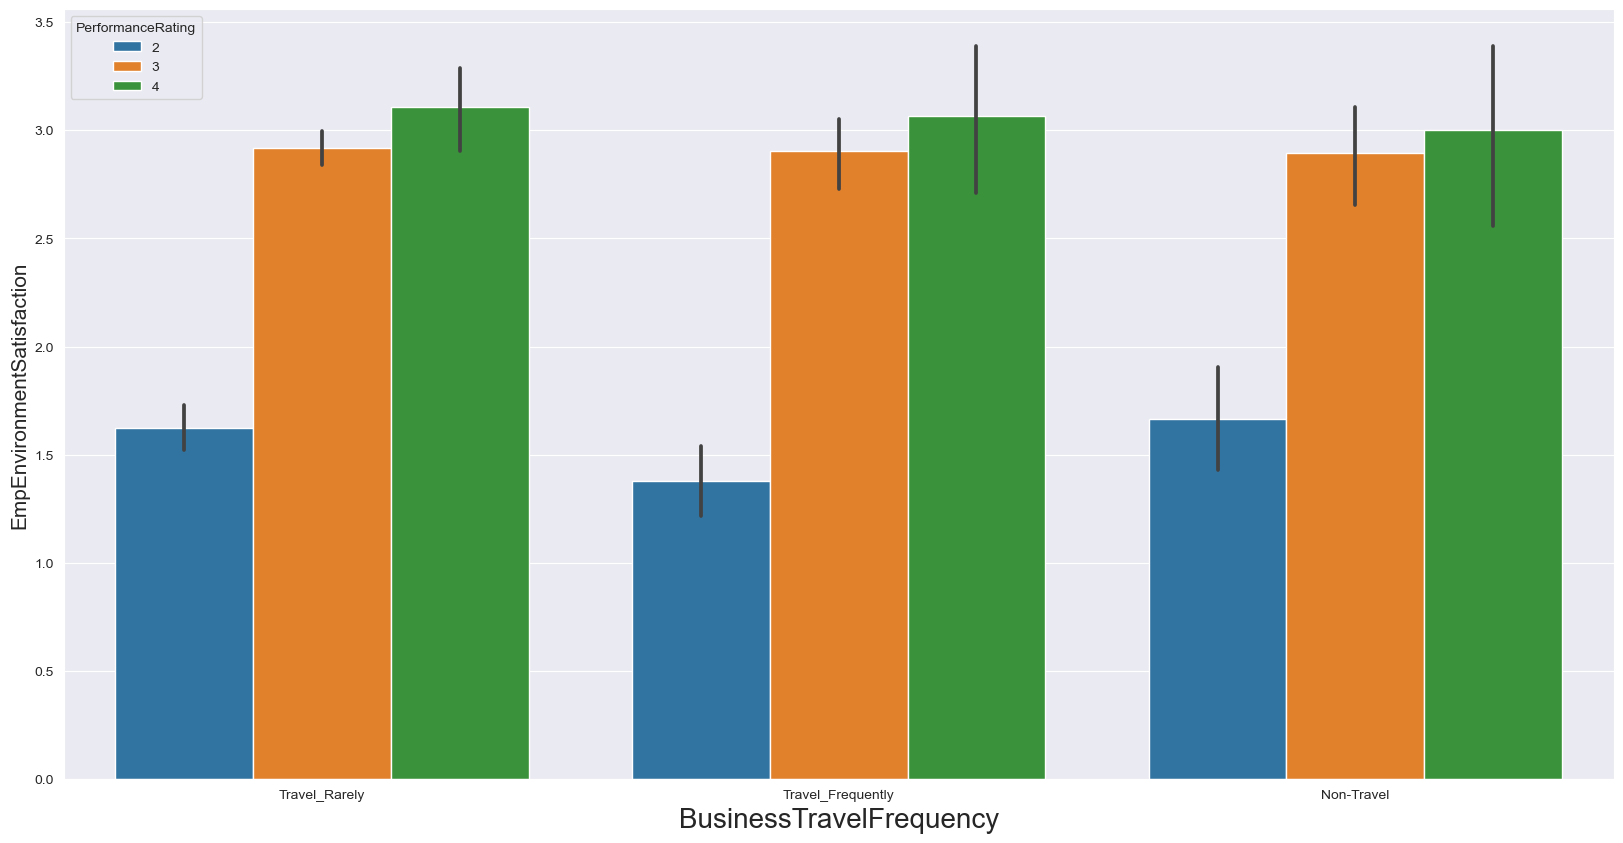

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

### Observation:

* If the employee enviorment satisfaction is high that time performance rating is 3 & 4 in all buisness travel frequency.
* Low employee enviorment satisfaction has 2 performance rating in all buisness travel frequency.

### 5.Check the relationship between Attrition & YearsWithCurrManager with respect to target feature

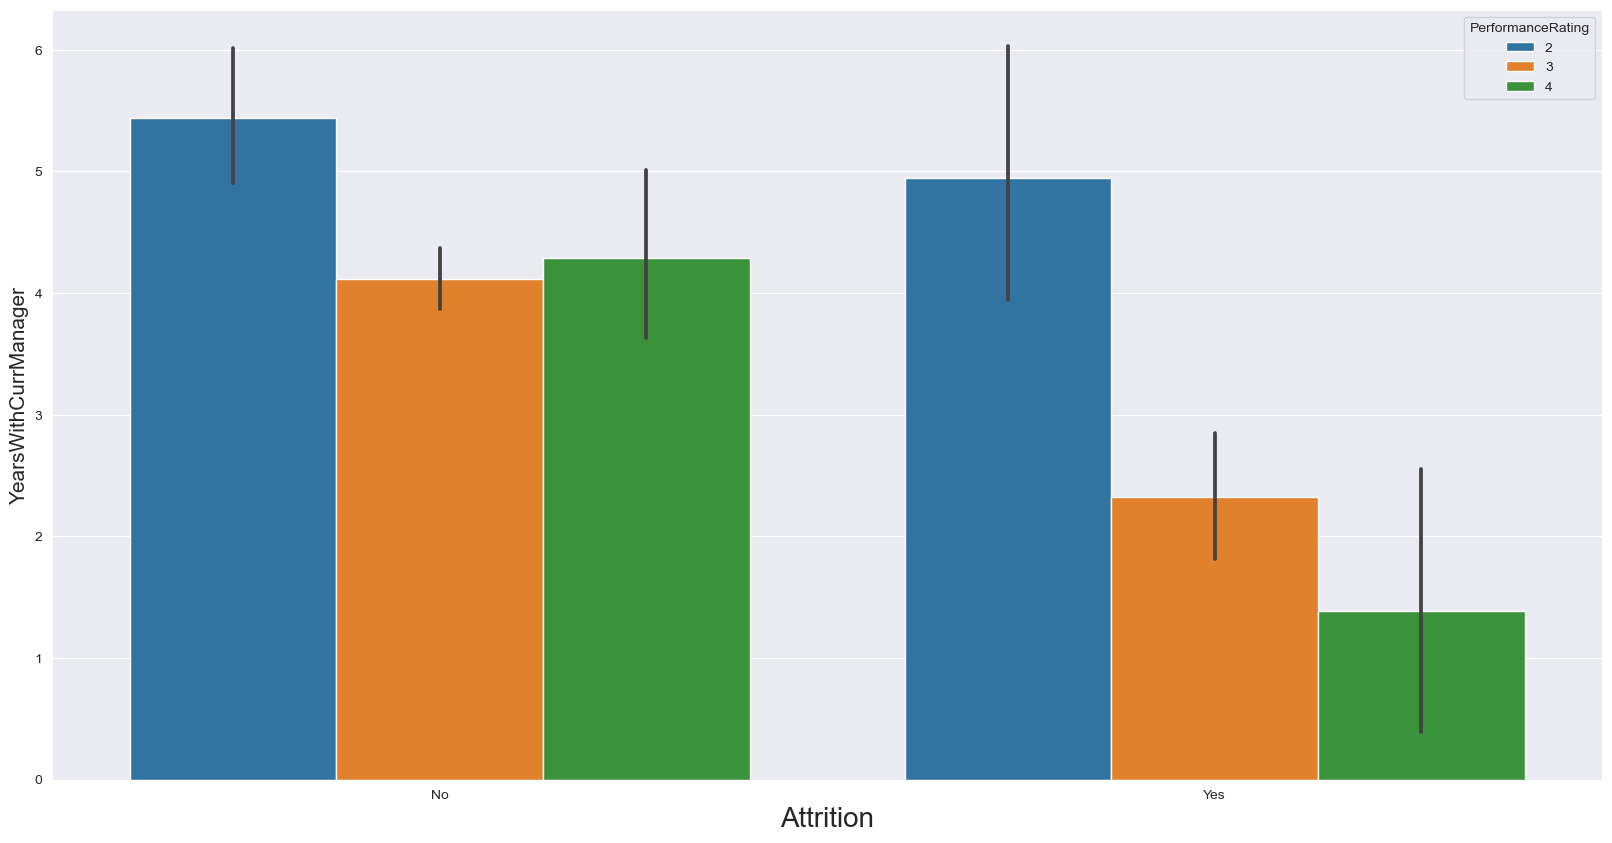

In [33]:


plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

### Observation:

* If the employee current manager year is increses that time performance rating is 2 and 50-50% chances of employee to leave the company.
* those employee perfomance rating is 4 and current manger year is increases that time most of the employee not leave the company.

### 6.Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature

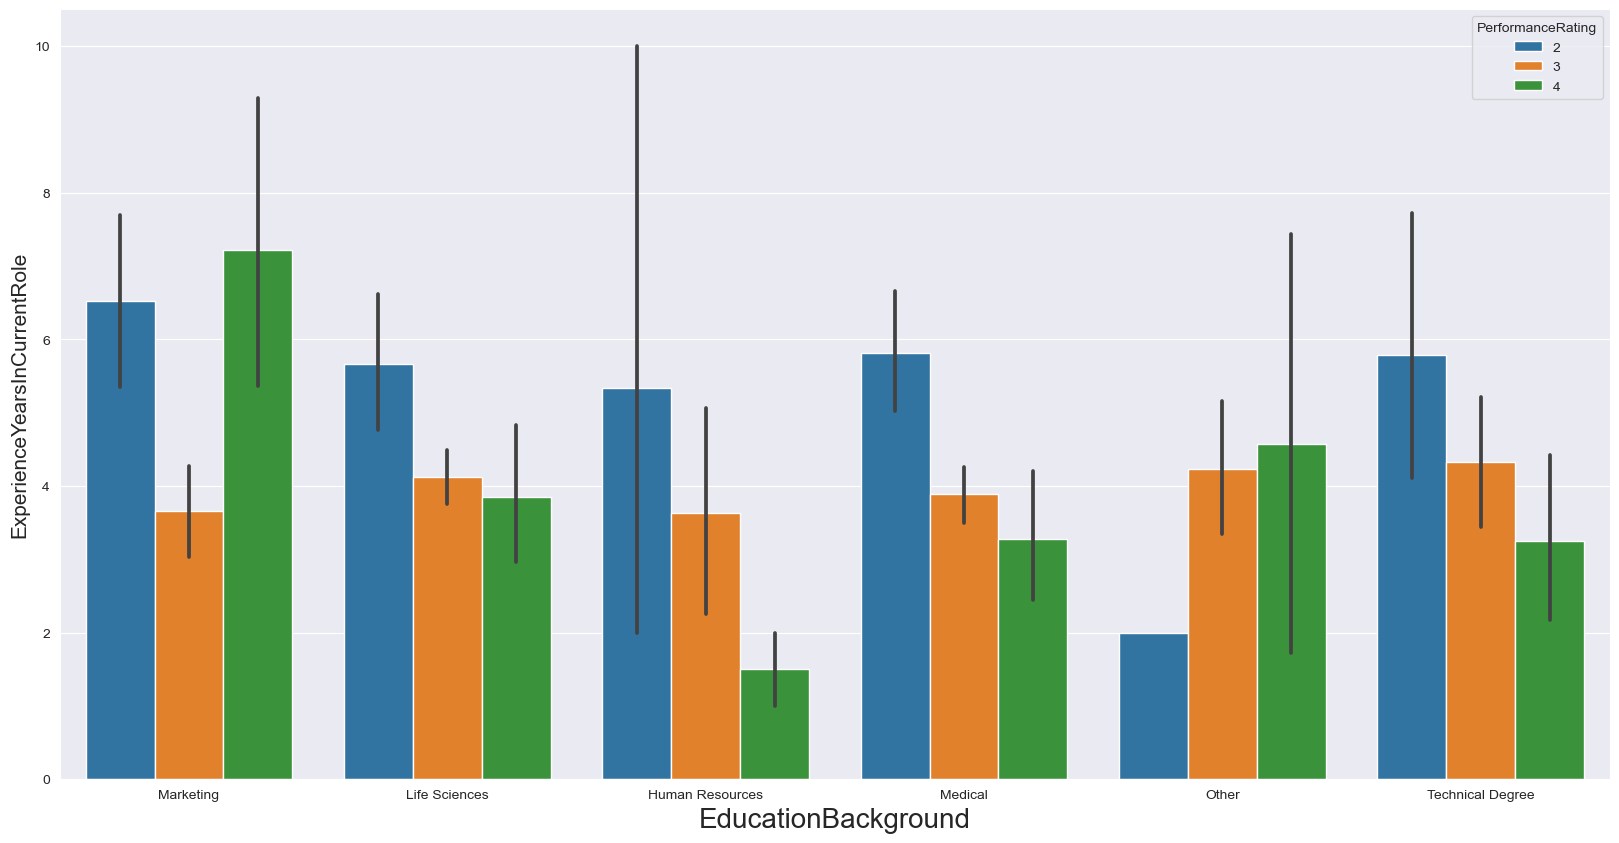

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

### Observation:

* If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
* In all education background with current role experiance is more than 5 then the performance rating of employee is 2.
* Life scineces, Medical, others , and technical degree education background employee has less than 4 year of experiance in current role that time performance rating is 3 & 4.

### 7.Check the relationship between OverTime & DistanceFromHome with respect to target feature

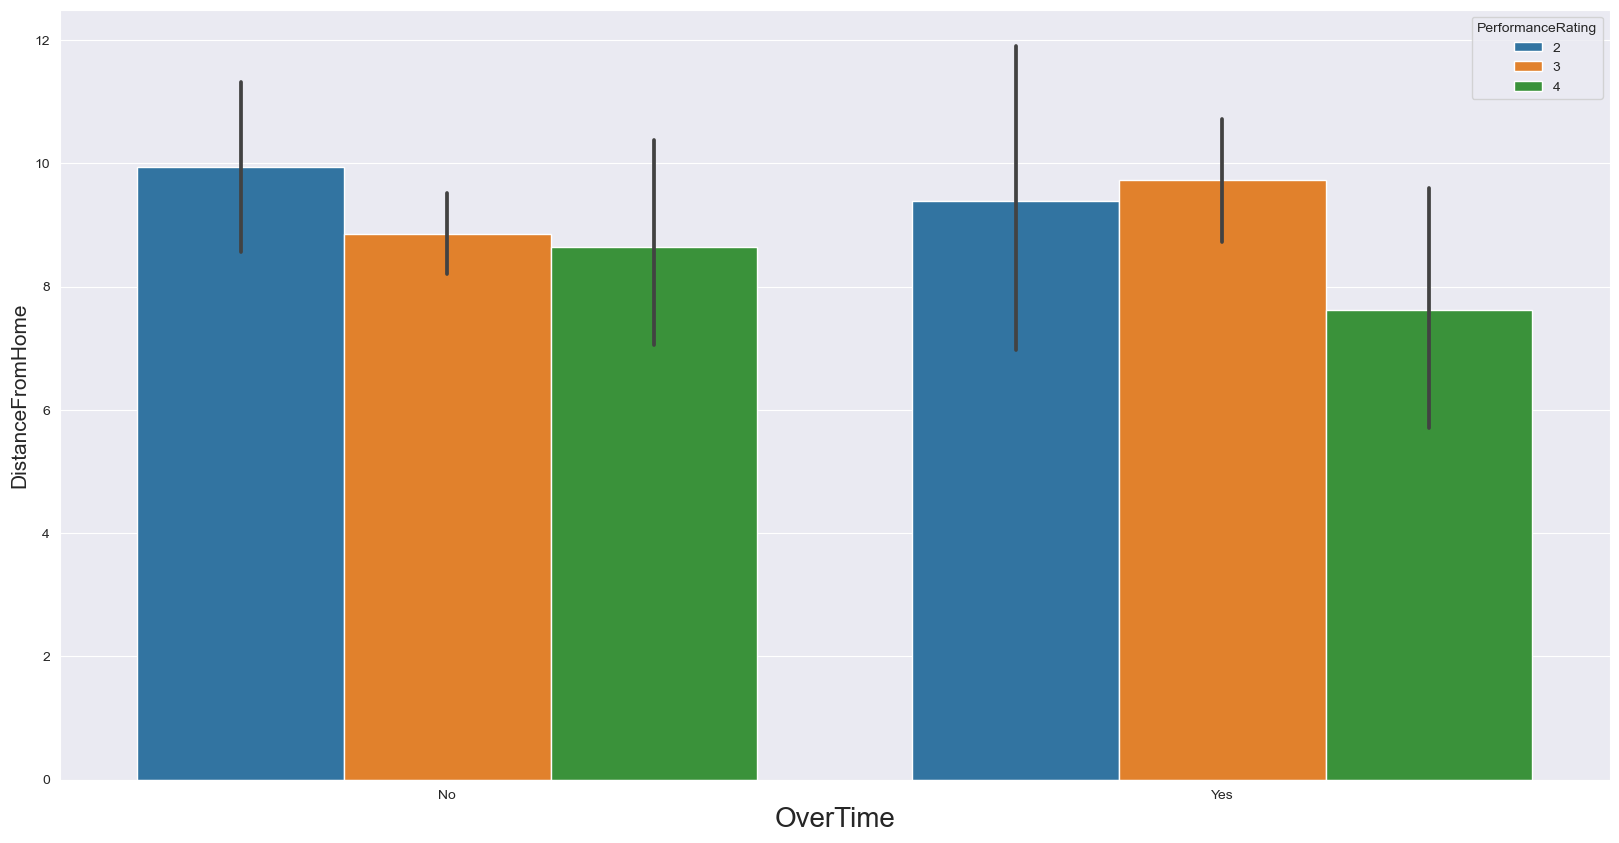

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=data.PerformanceRating,data=data)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

### Observation:

* If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
* In all education background with current role experiance is more than 5 then the performance rating of employee is 2.
* Life scineces, Medical, others , and technical degree education background employee has less than 4 year of experiance in current role that time performance rating is 3 & 4.

### 8.Check the relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature

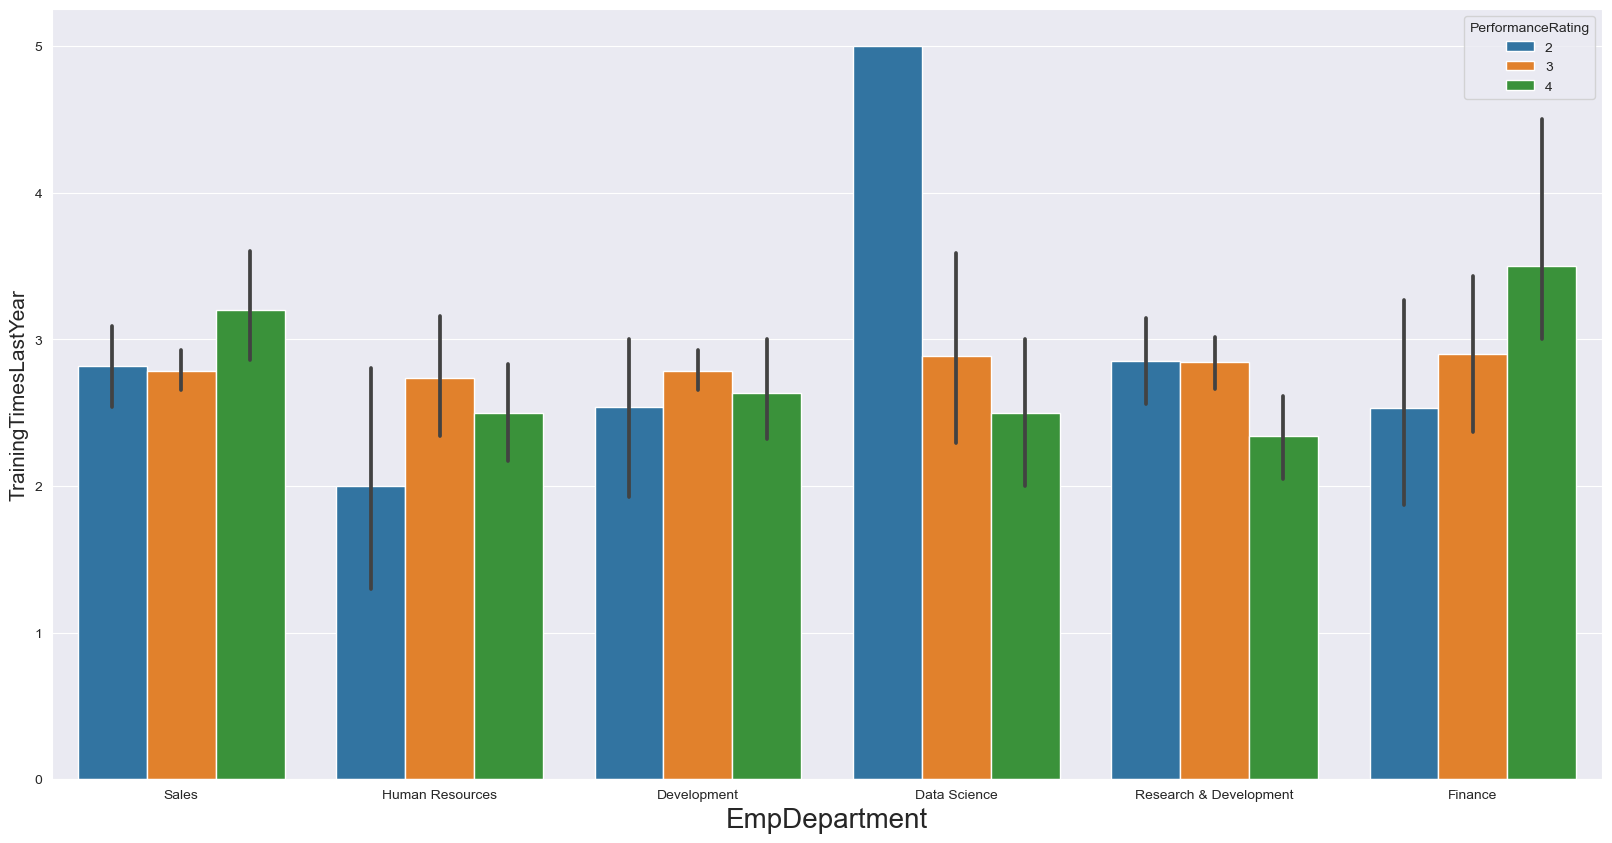

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()

### Observation:

* If the employee from data science department and most training time in last year then the performance rating is 2 maximum time.
* Other all employee department with less than 3 time training in last year then the peroformance rating is constant.

### 10.Check the relationship between Attrition & NumCompaniesWorked with respect to target feature

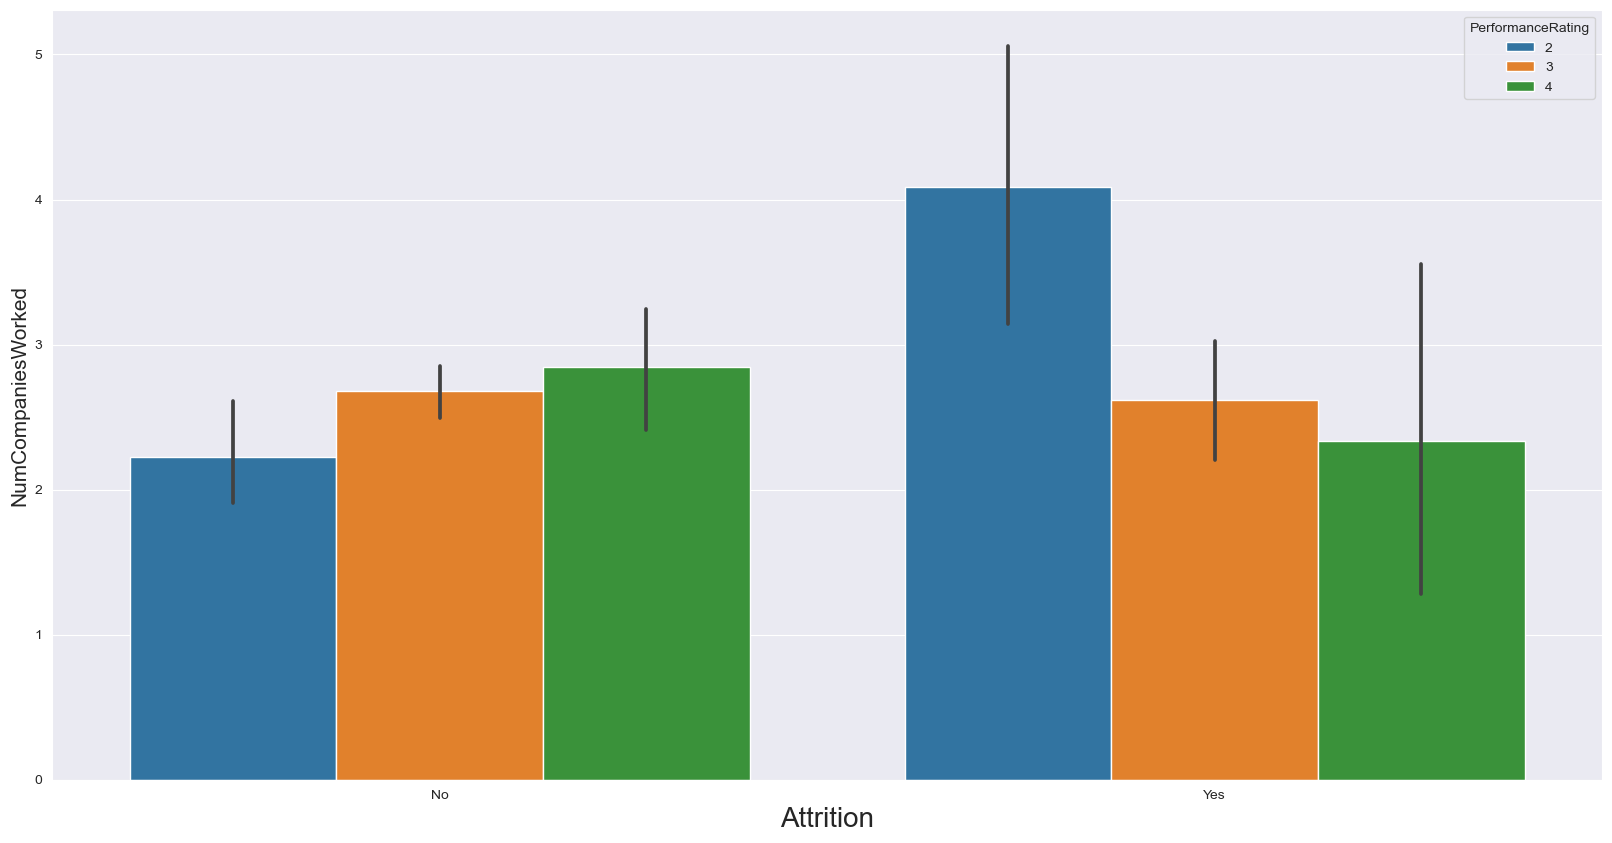

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

### Observation:

* If emplyee number of companies worked is increses that time most of the employee leave the company and their performance rating is 2
* Those employee have work in less no of companies they are not leave the company and their performance rating is constant.

### Insight

* There are some features are positively correlated with performance rating( Target variable) [Emp Environment Satisfaction,Emp Last Salary Hike Percent,Emp Work Life Balance]

### DEPARTMENT WISE PERFORMANCE RATING

### PLOT USED

* Violinplot: It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
* CountPlot: countplot is used to Show the counts of observations in each categorical bin using bars.

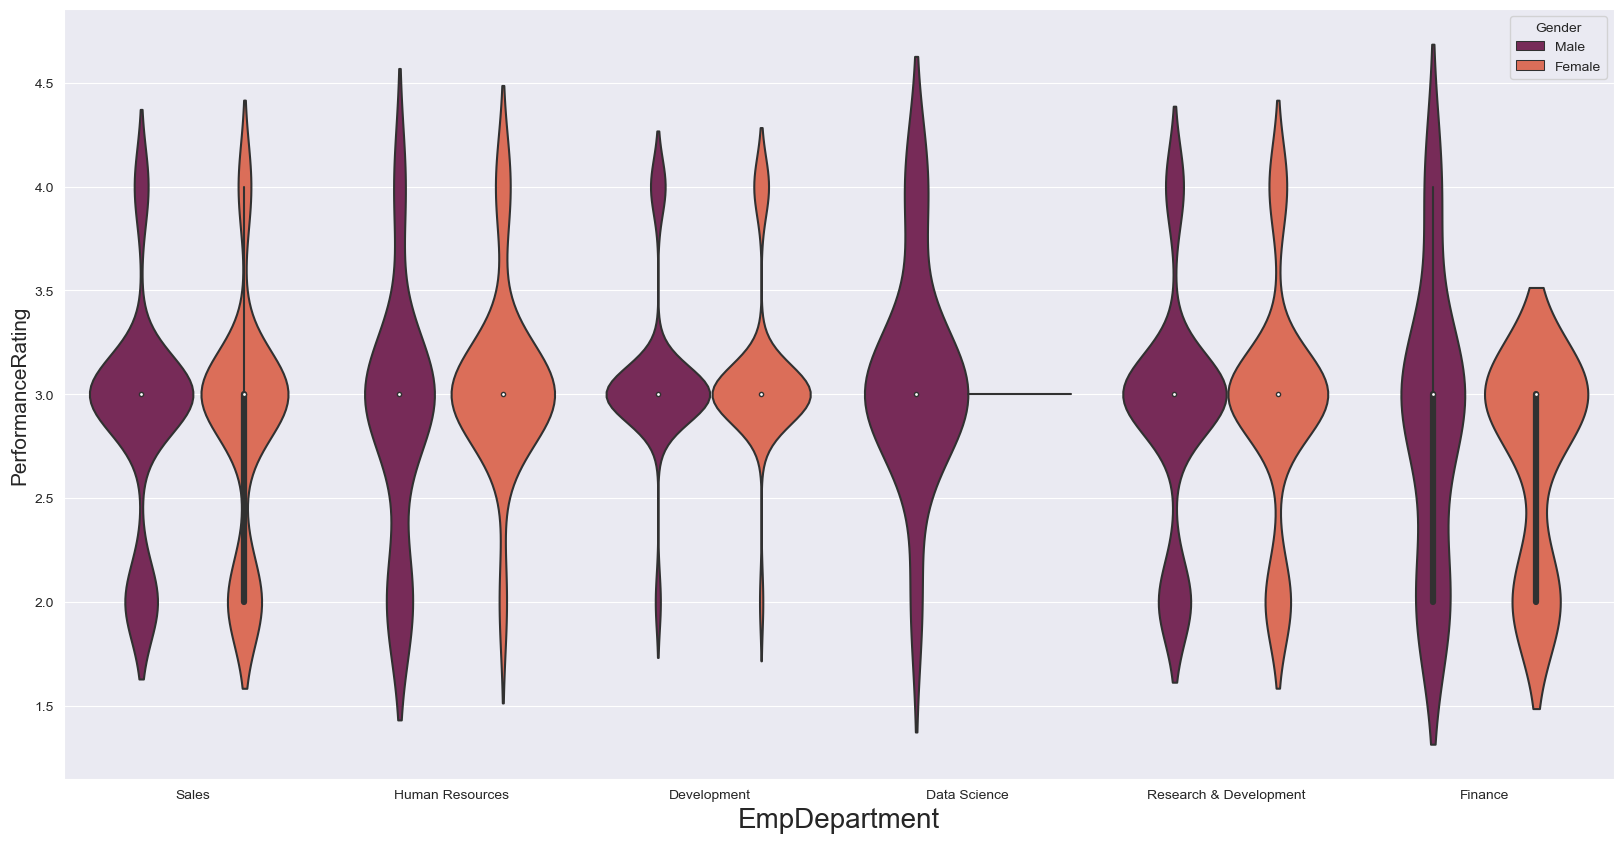

In [38]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='rocket')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

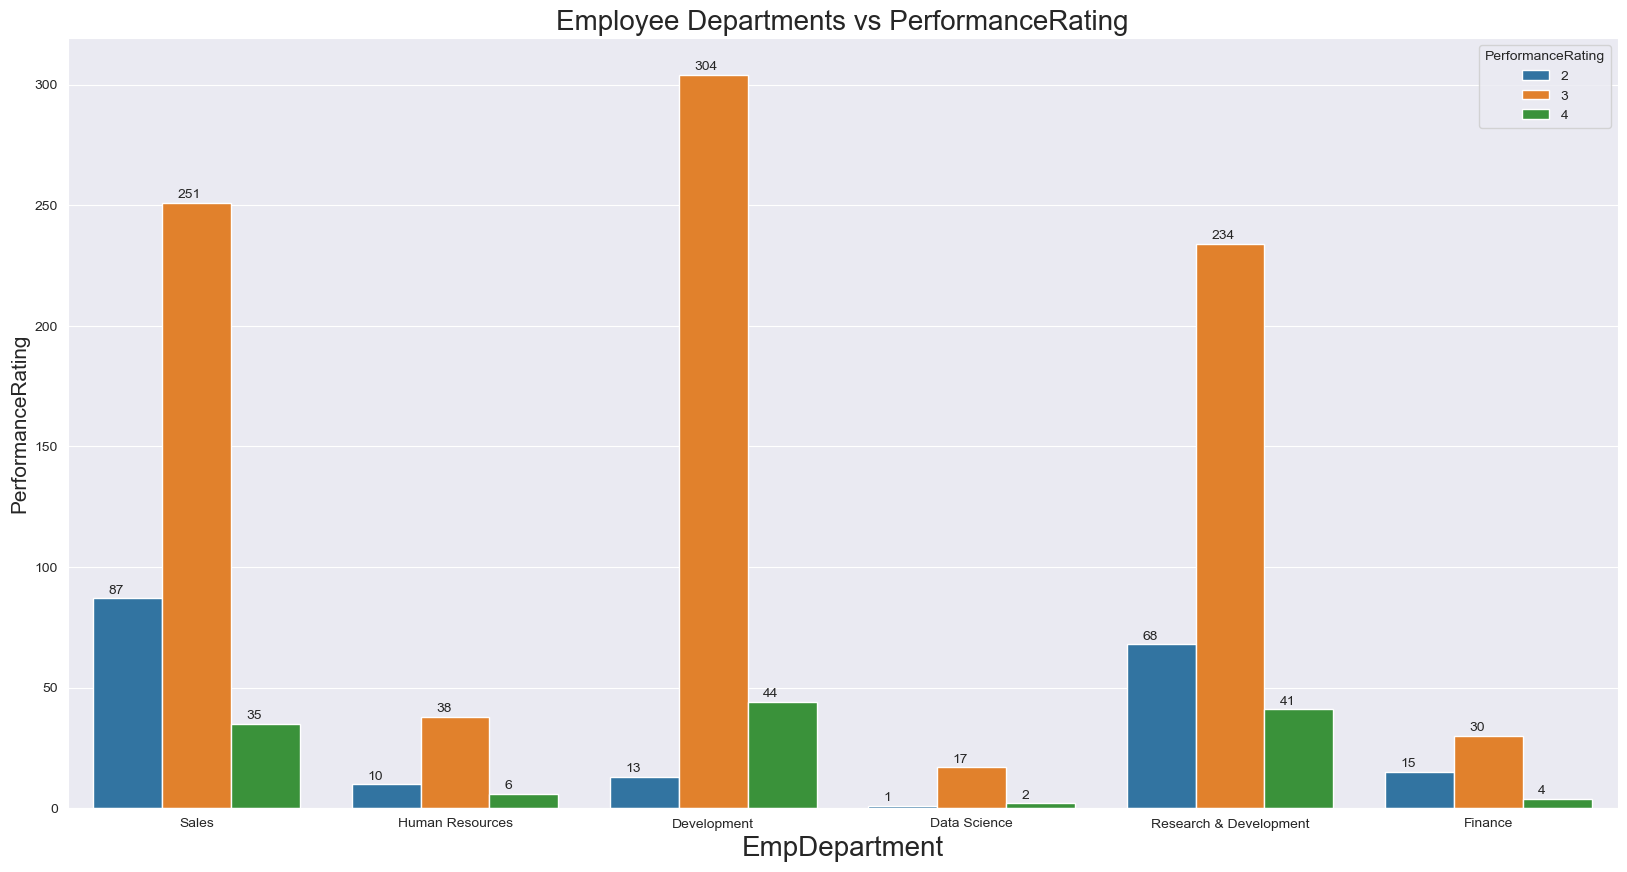

In [39]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

## Observation:

### From the above graph we can conclude that from the EmpDepartment Development department is showing High performance rating

### Sales:
The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

## Human Resources: 
The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

### Development: 
The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

### Data Science: 
The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

### Research & Development: 
The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

### Finance: 
The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [40]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


## TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

### From visualisation file we get the top 3 factor affecting to the employee performance

1) Emp Environment Satisfaction
2) Emp Last Salary Hike Percent
3) Emp Work Life Balance

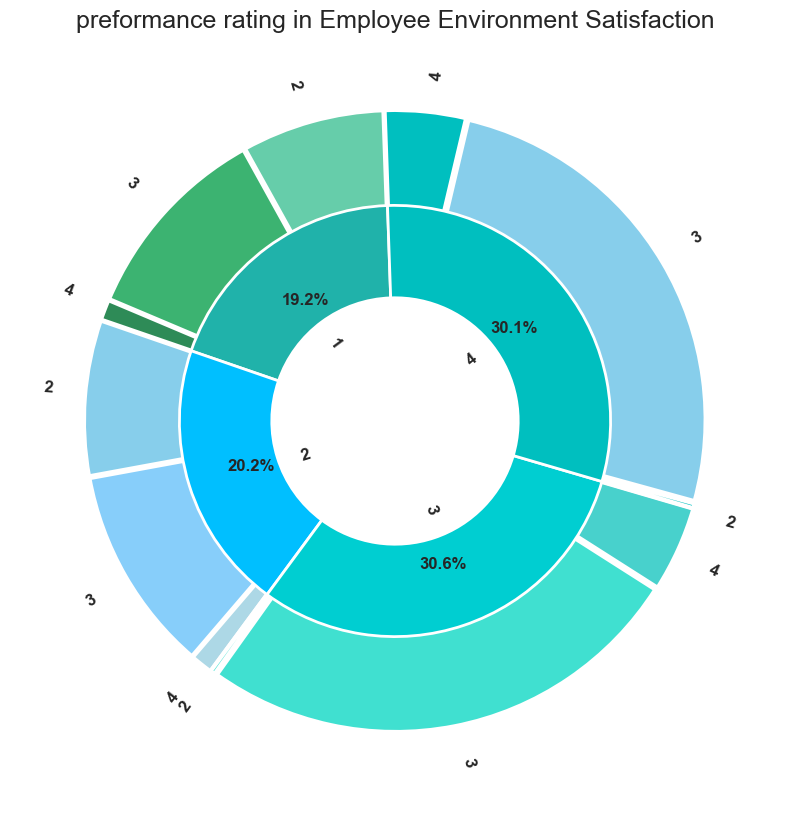

In [41]:
# 1.Employee enviorment Satisfaction
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("preformance rating in Employee Environment Satisfaction",fontsize=18)
plt.pie([90,127,13,98,130,14,3,310,54,3,307,51], radius=1,
        colors=["mediumaquamarine","mediumseagreen","seagreen",
                "skyblue","lightskyblue",'lightblue',
                'turquoise','turquoise','mediumturquoise',
                'c','skyblue','c',
               ],explode =[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
        labels=[2,3,4,2,3,4,2,3,4,2,3,4],rotatelabels=True,
        pctdistance=0.82, textprops = {"fontsize":12,"fontweight":"bold"},startangle=92,
        wedgeprops=dict(width=0.6, edgecolor='w',linewidth=3))

plt.pie([230,242,367,361], radius=0.7,
        colors=['lightseagreen','deepskyblue',"darkturquoise","c"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=2),textprops = {"fontsize":12,"fontweight":"bold"},
        autopct='%.1f%%',
        labels=[1,2,3,4],
        pctdistance=0.70, labeldistance=0.4, rotatelabels=True,startangle=92)
plt.show()

In [42]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [43]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


### Observation:

### 1.Employee Enviroment satisfaction:

* Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

### 2.Employee last salary hike percent:

* More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
* Employees whose salary hike percentage is in between 20-22%, There performance rating is 4

### 3.Employee work life balance:

* In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees

### CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE
* Those feature continuous in nature only use this feature to plot a distribution

### Distplot: 
* Distplot is used to observe how the data is distributed in a particular dataset.

In [44]:
# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


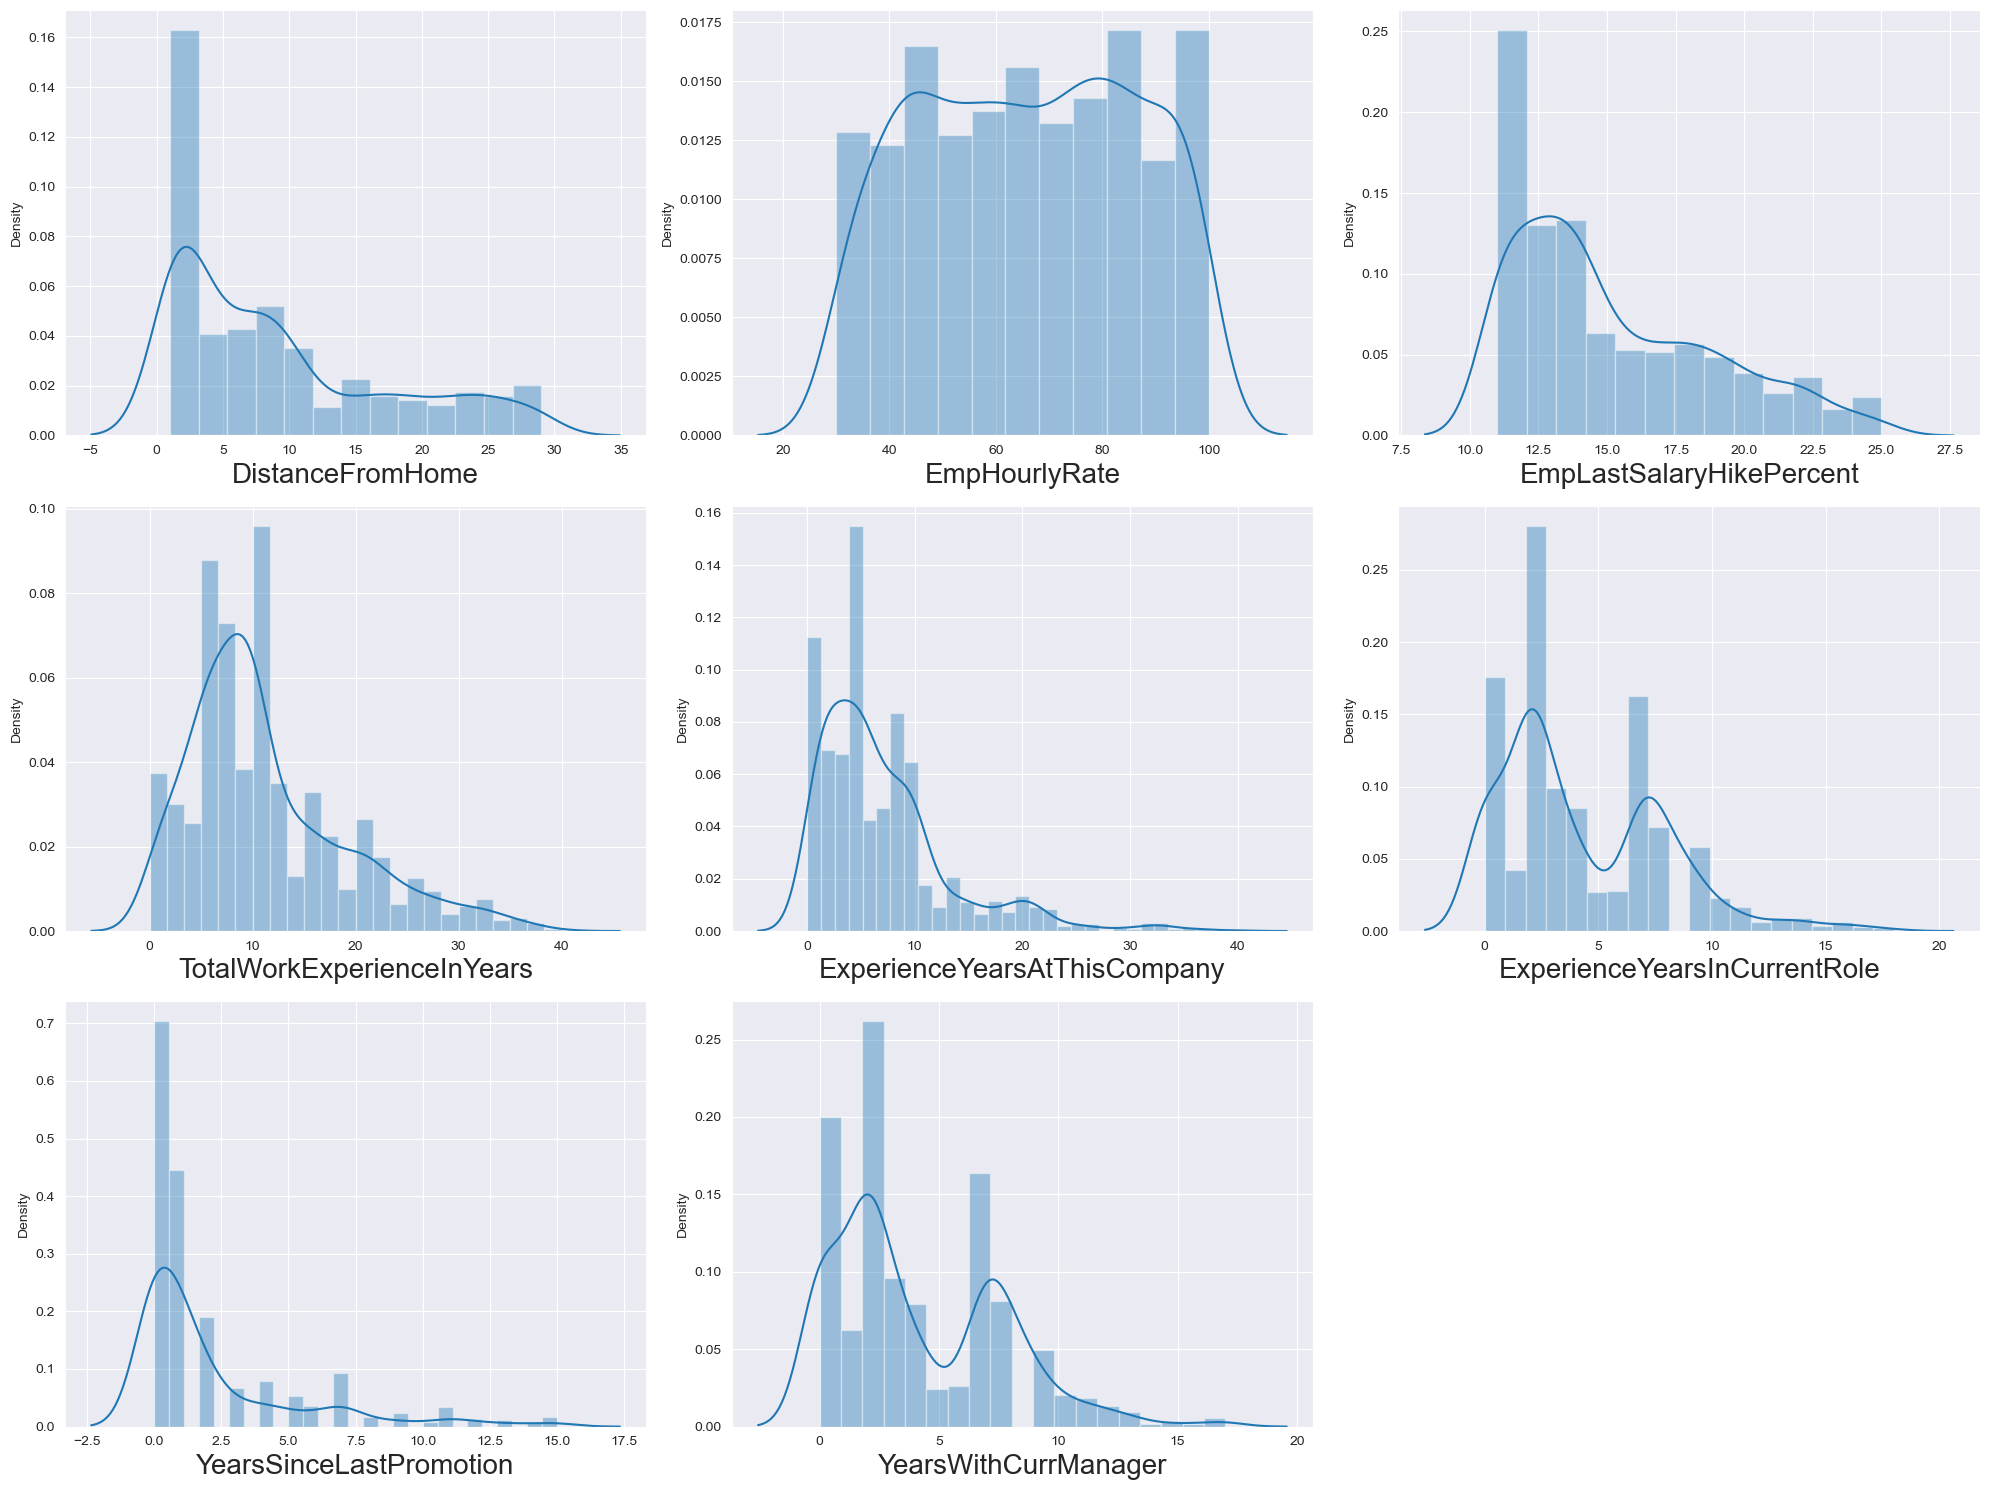

In [45]:
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

## DATA PRE-PROCESSING & FEATURE SELECTION:

### DATA PRE-PROCESSING SUMMARY:

* Ckeck Missing Value
* Convert categorical to numerical
* Check outliers & Impute outliers
* Feature transformation
* Feature scaling

### FEATURE SELECTION SUMMARY:

* Drop unique & Constant Column
* Check correlation with heatmap & Remove highly correlated feature
* Check Duplicates
* Principle component analysis
* Save pre-process data

### 1.Mannual Encoding:
Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

### 2.Frequency Encoding:
Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

## 1.Gender:

In [46]:
data.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [47]:
# Use mannual encoding to map the labels
data.Gender = data.Gender.map({'Male':1,'Female':0})

In [48]:
data.Gender.value_counts()

Gender
1    725
0    475
Name: count, dtype: int64

#### Map male with 1 and female with 0

## 2.Education Background

In [49]:
# Get value counts of Education Background
data.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [50]:
# Use frequency encoding
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [51]:
data.EducationBackground.value_counts()

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64

## 3.Marital Status

In [52]:
# Get the value counts of marital status
data.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [53]:
# Use mannual encoding
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [54]:
data.MaritalStatus.value_counts()

MaritalStatus
2    548
1    384
0    268
Name: count, dtype: int64

## 4.Employee Department

In [55]:
# Get the value counts of employee department 
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [56]:
# Use Frequency encoding
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [57]:
data.EmpDepartment.value_counts()

EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64

## 5.Employee Job Role

In [58]:
# Getting the value counts of EmpJobRole
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [59]:
# Use frequency encoding because feature contain a lots of label
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [60]:
# Check conversion happen or not
data.EmpJobRole.value_counts()

EmpJobRole
18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: count, dtype: int64

## 6.Business Travel Frequency:

In [61]:
# Get the value count of buisness travel frequency
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [62]:
# Use mannual encoding Because feature contain minimum label
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [63]:
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

## 7.Overtime:

In [64]:
# Get the value count of Overtime
data.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [65]:
# Use mannual Encoding
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [66]:
# Check conversion happen or not
data.OverTime.value_counts()

OverTime
1    847
0    353
Name: count, dtype: int64

## 8.Attrition

In [67]:
# Get the value counts of Attrition
data.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [68]:
# Use Mannual encoding because feature contain less no of label
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [69]:
# Get the value counts of Attrition
data.Attrition.value_counts()

Attrition
1    1022
0     178
Name: count, dtype: int64

In [70]:
# Check all data features 
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,...,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,...,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,...,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,...,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,...,4,10,1,3,2,2,2,2,1,3


### CHECK OUTLIERS AND IMPUTE OUTLIERS:

### BoxPlot: 
Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.

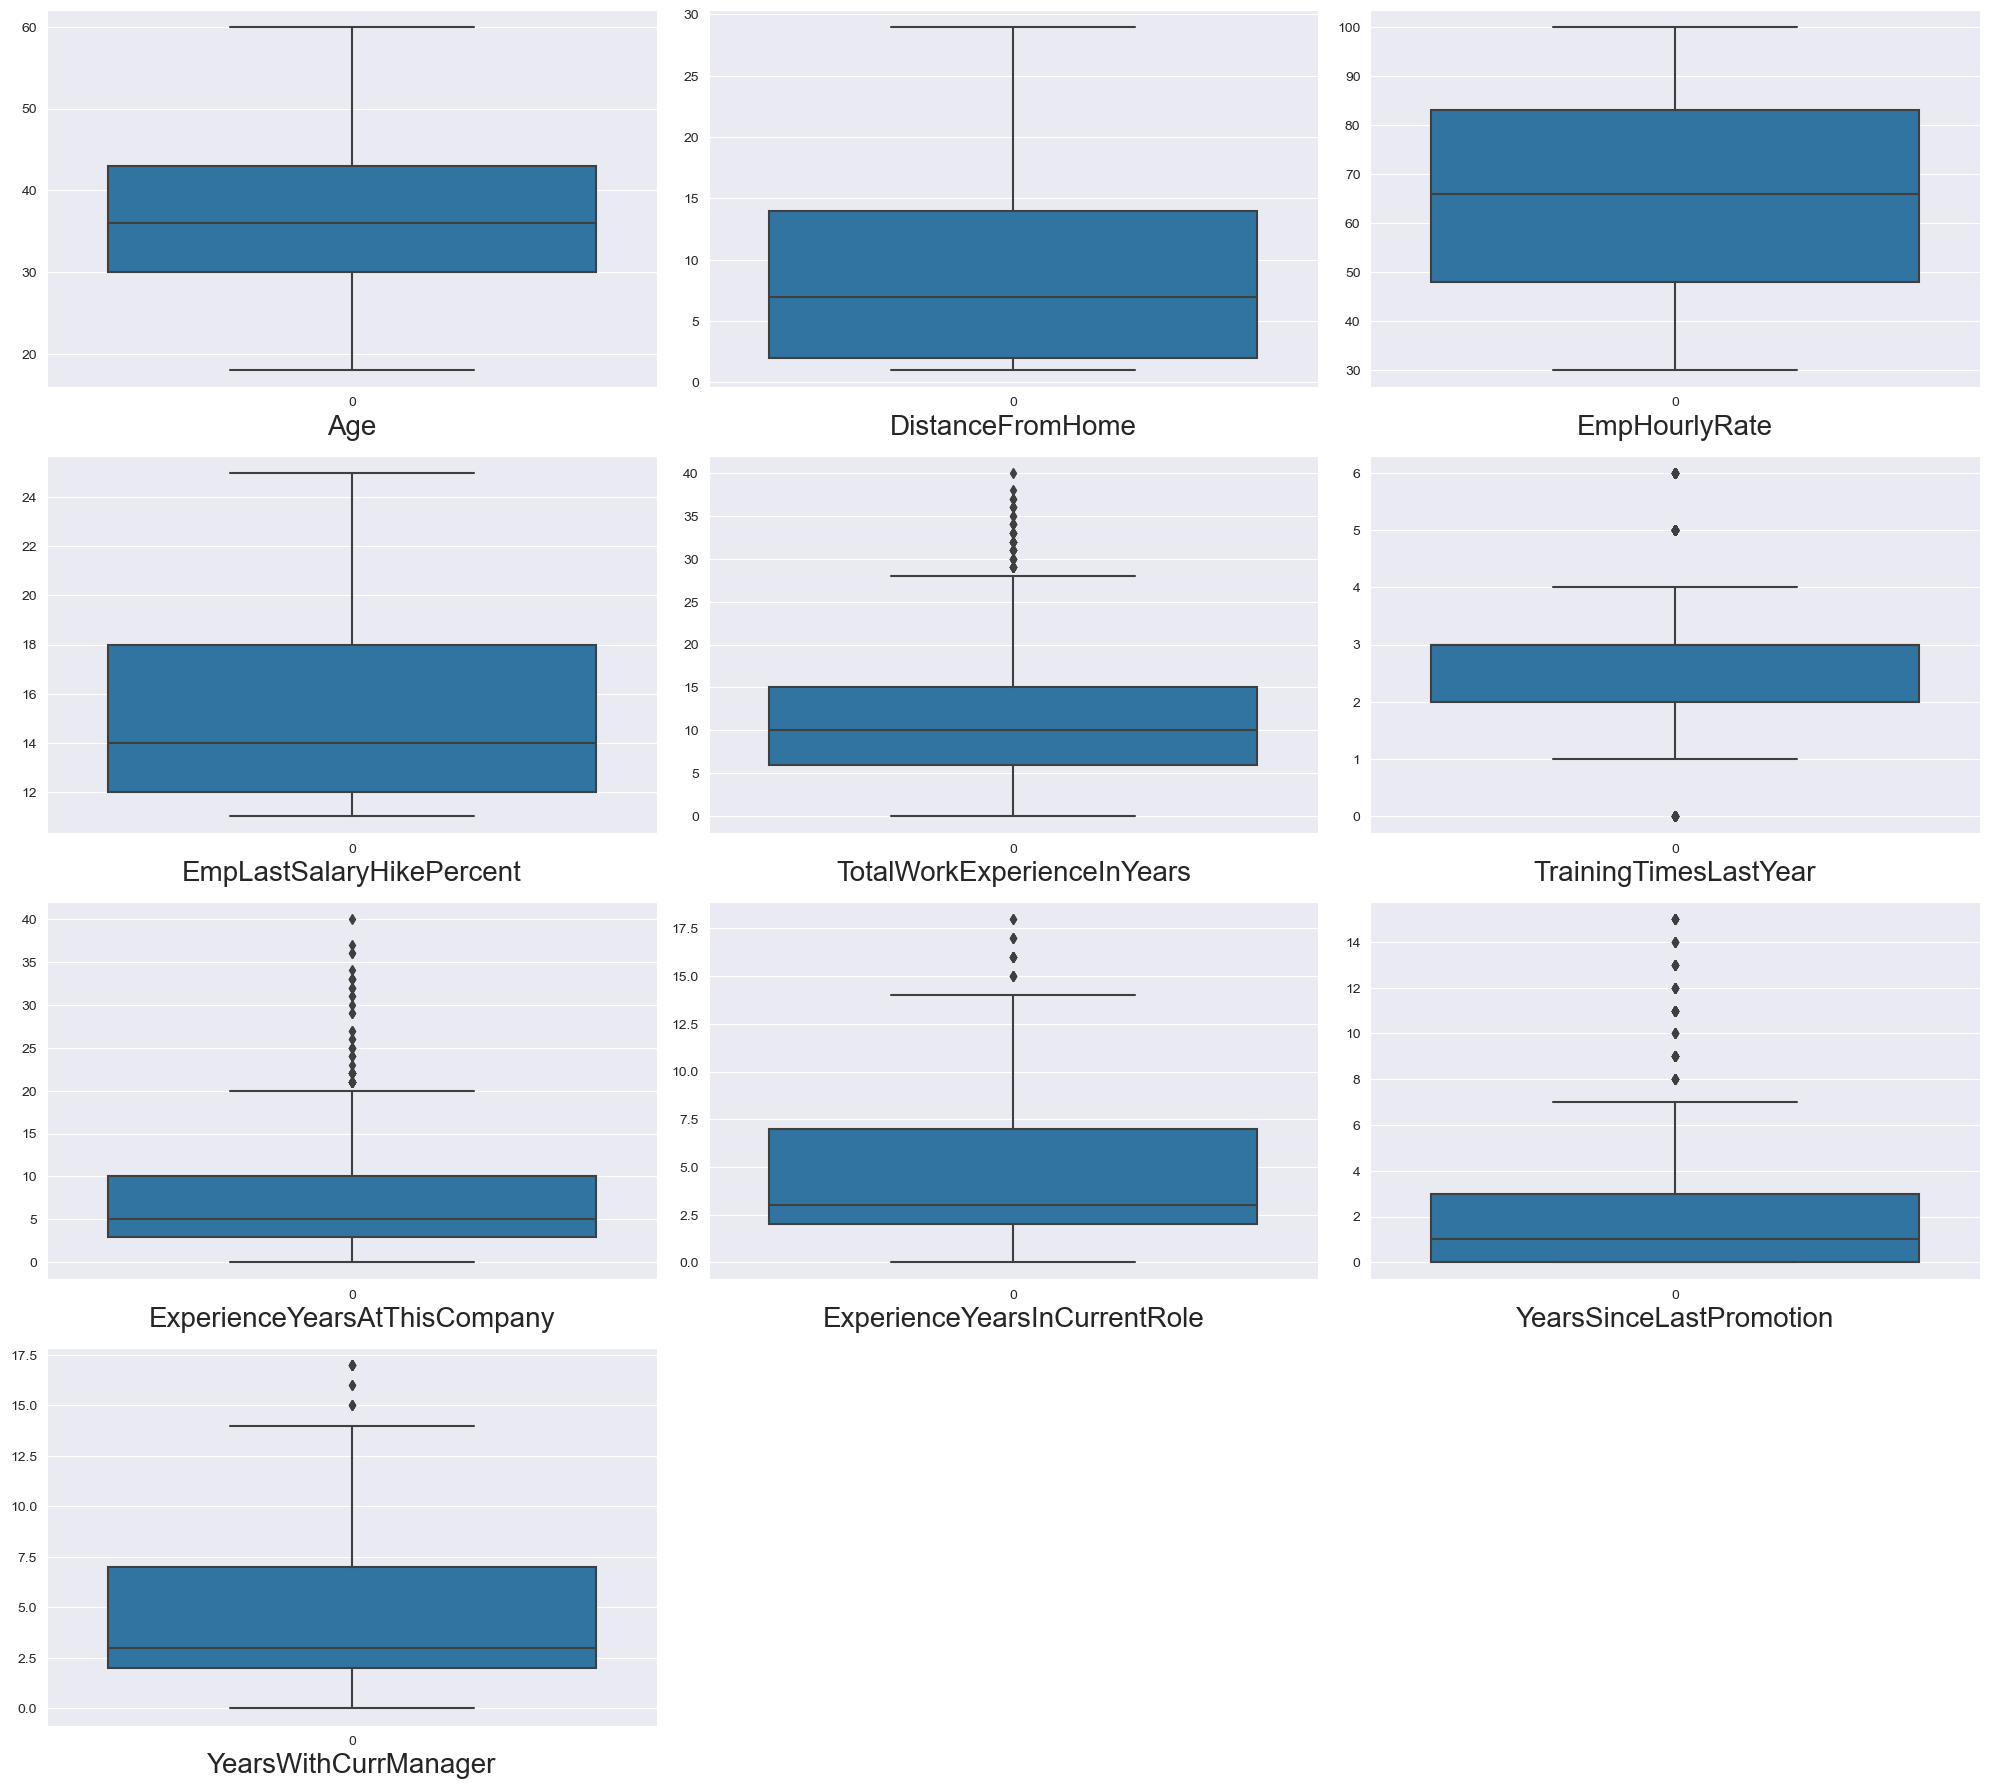

In [71]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

* Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.

### IQR:

* IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

### 1.Total Work Experiance in year

In [72]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [73]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [74]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 2.Training Times Last Year

In [75]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [76]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [77]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [78]:
# Filtering the max limit
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 3.Experience Years At This Company

In [79]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [80]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [81]:
# Filtering the data
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 4.Experience Years In Current Role

In [82]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [83]:
# Impute the outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [84]:
# Filtering the data
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 5.Years Since Last Promotion

In [85]:

# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [86]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [87]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### 6.Years With Current Manager

In [88]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [89]:
# impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [90]:
# Filtering the data
data.loc[data['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


### CHECKING OUTLIER AFTER IMPUTATION

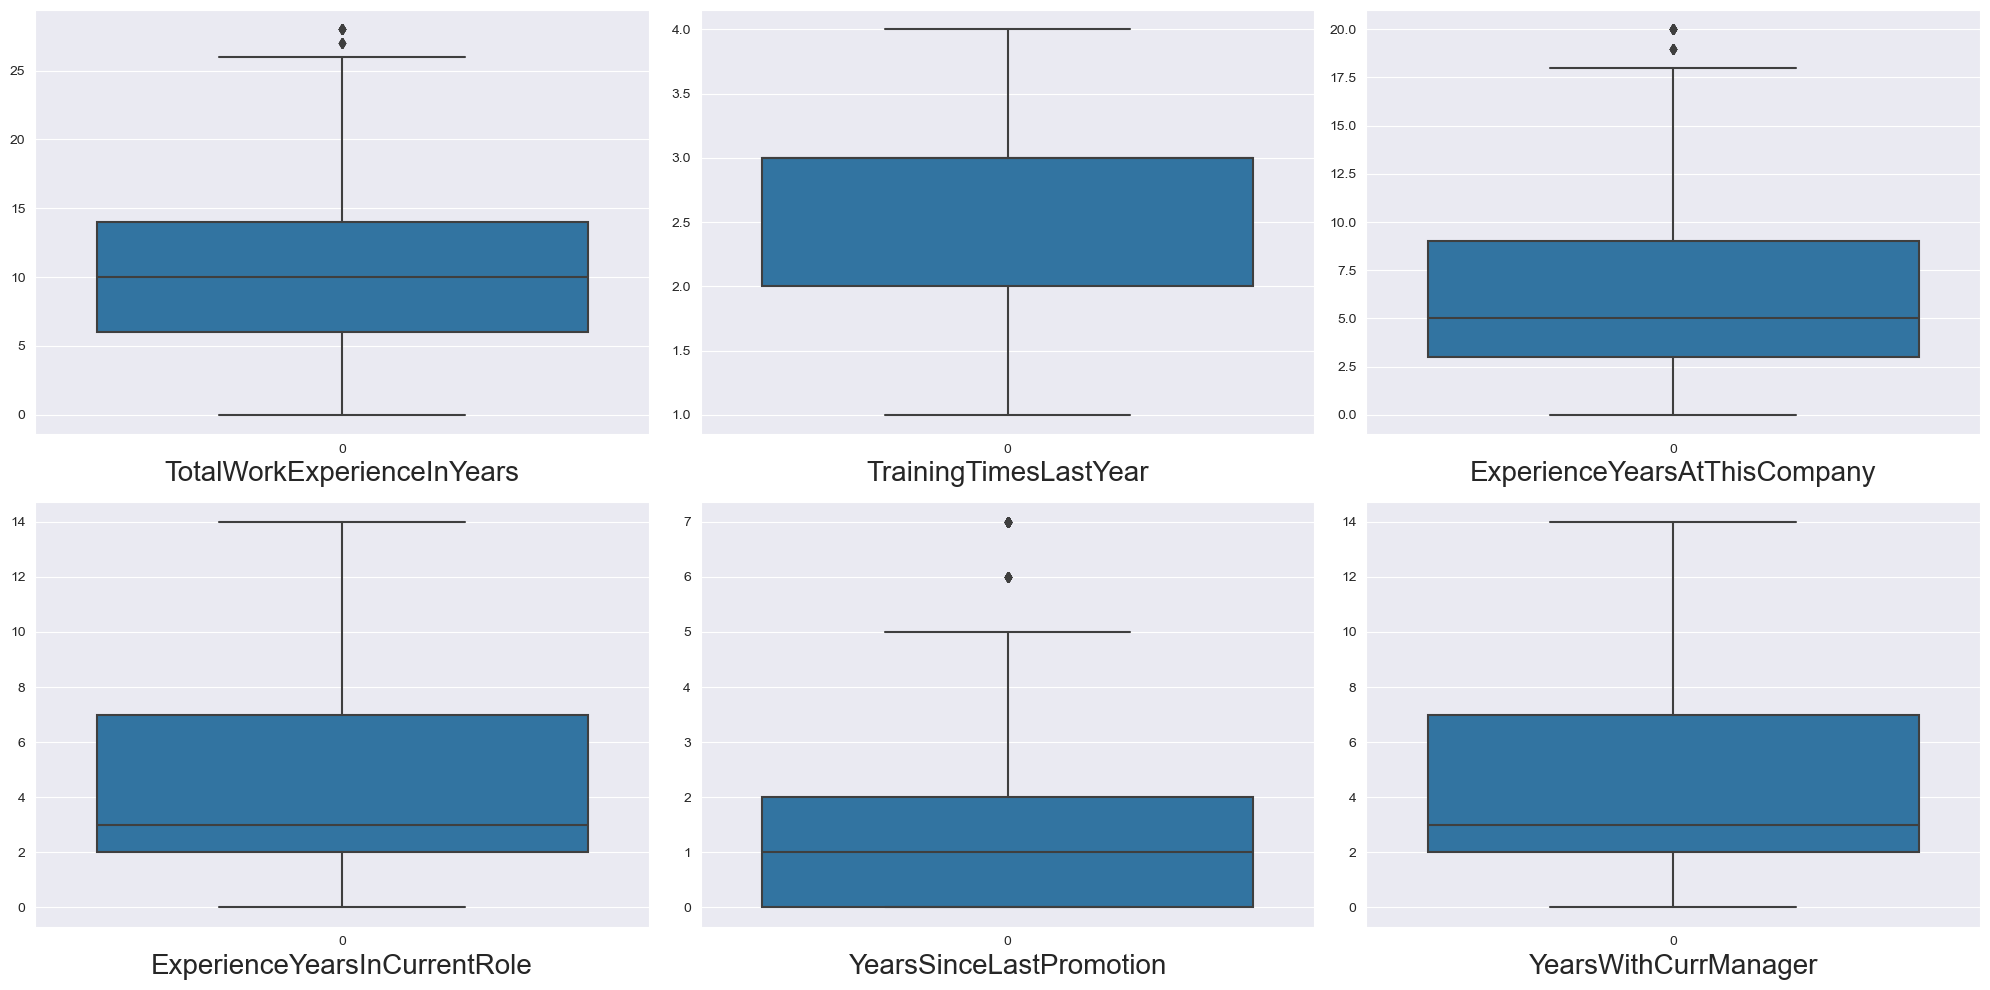

In [91]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### Observation:

* Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

### SCALING THE DATA

### Standard Scaling: 
Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [92]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
     ]]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager']])

In [93]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,...,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,...,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,...,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,...,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,...,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3


## FEATURE SELECTION

### DROP UNIQUE AND CONTANT FEATURES

### CHECKING CORELATION


* Heatmap: A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

In [94]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
data.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

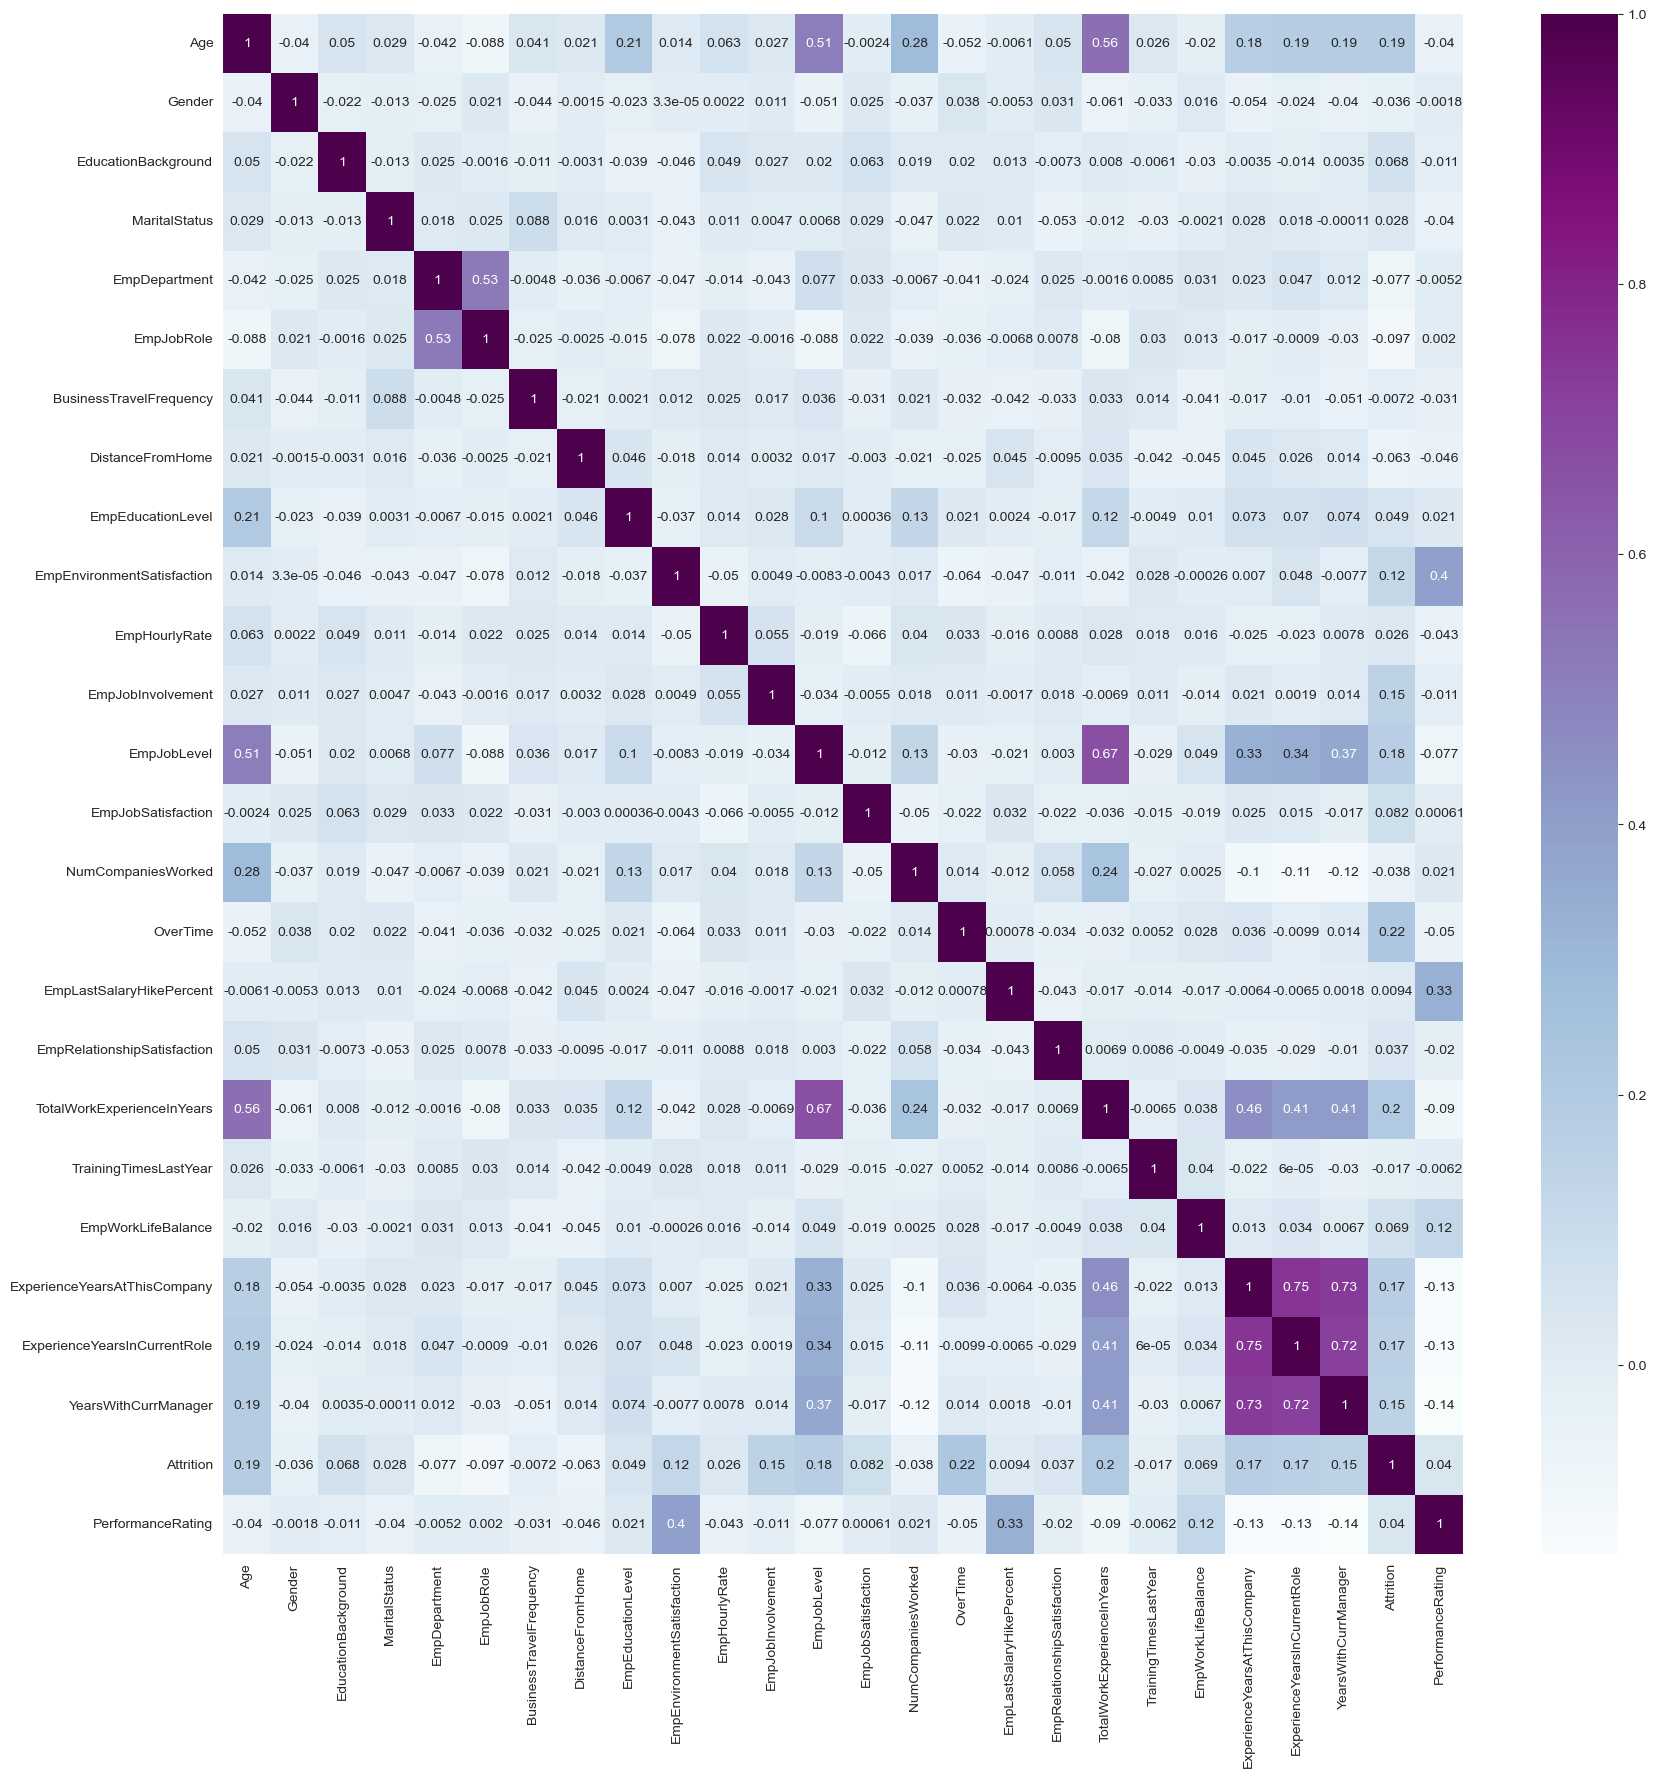

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

* From above heatmap scale we are clearly seen the their is no highly correlated feature in data But we confirm with the help of simple code

In [96]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


* Now we confirm their is no highly correlated feature is present.

### CHECKING DUPLICATES

In [97]:
data.duplicated().sum()

0

* Their is no Duplicates is present in data.

### PRINCIPLE COMPONENT ANALYSIS

* Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

### Used For: 
* The dataset contain more than 25 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance.

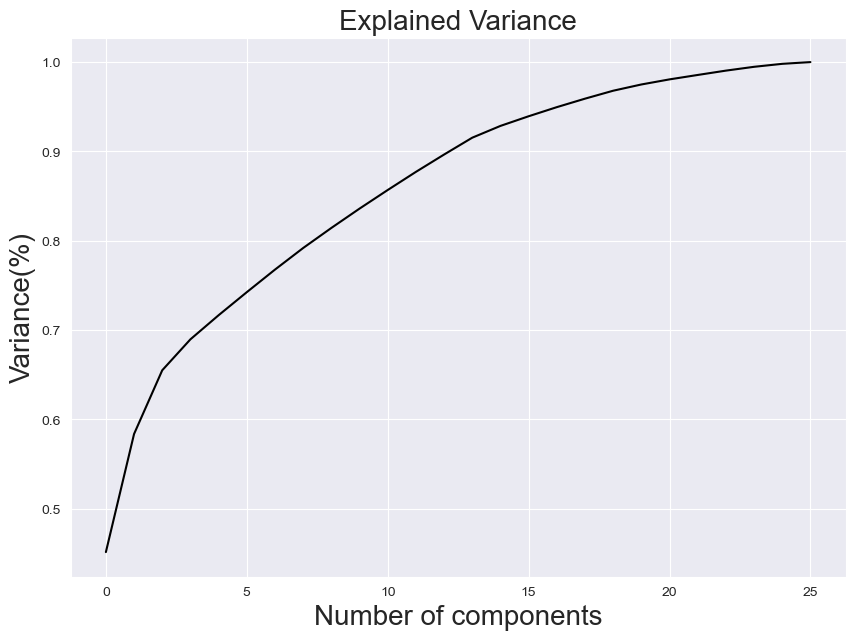

In [98]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

### Observation:
* Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [99]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

array([[-4.47461716e+00, -1.63560593e+00,  1.35987621e+00, ...,
         3.10695715e-01, -2.73622936e-01, -1.62067879e-01],
       [-4.35738815e+00, -5.78705541e-02,  2.03984914e+00, ...,
        -1.75001965e-01, -6.84618293e-01, -2.95399760e-04],
       [-4.24499121e+00,  2.58127897e+00,  4.42478564e+00, ...,
        -2.47450319e-01,  7.45476759e-01, -3.71271973e-01],
       ...,
       [ 1.63617185e+00, -1.70581162e+00,  2.93429334e+00, ...,
         3.82850443e-01,  1.12063899e+00, -1.59847038e-02],
       [ 9.09432080e+00, -2.06377521e+00,  9.51413543e-01, ...,
        -1.06420004e-01, -3.93245664e-01,  1.57389654e-01],
       [-4.36719775e+00,  5.98465271e+00, -2.44147010e+00, ...,
        -1.08101073e-01, -1.21159952e-01,  5.08514388e-01]])

### CREATE NEW DATAFRAME

In [101]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.474617,-1.635606,1.359876,0.965490,-1.550080,0.179717,0.843739,-1.594458,0.749029,-0.020451,...,0.106931,-0.601961,0.097510,0.039537,-0.287547,-0.451346,0.310696,-0.273623,-0.162068,3
1,-4.357388,-0.057871,2.039849,1.537299,0.291088,1.628643,0.763073,0.155870,1.045583,0.797368,...,-0.358400,0.423352,-0.879996,-0.539284,-0.275408,-0.922157,-0.175002,-0.684618,-0.000295,3
2,-4.244991,2.581279,4.424786,-0.162870,-1.914806,1.102650,-1.479360,0.442567,0.838079,1.505285,...,0.507253,0.461541,0.188903,-0.380440,0.173953,-0.417505,-0.247450,0.745477,-0.371272,4
3,3.012637,0.735434,2.433771,3.347248,1.326405,-2.357479,1.226972,0.340809,-0.223106,-0.053884,...,0.891003,-1.504801,0.590889,0.202439,0.223840,-0.577573,-0.024454,-0.471628,-0.471033,3
4,-4.249783,5.975149,-0.464801,0.783218,2.877106,0.052133,-0.434443,-0.391564,0.845524,1.203842,...,-0.300831,1.104789,-1.216270,0.843609,0.101158,-0.177141,0.471097,-0.151107,-0.447970,3


## MODEL CREATION & EVALUATION SUMMARY:
* Loading pre-process data
* Define dependant & independant features
* Balancing the target feature
* Split training and testing data
* Model creation, prediction & evaluation
* Model saving

In [102]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [103]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

### BALANCING THE TARGET FEATURE

* SMOTE: SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [104]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


* Now target feature in balance

### SPLIT TRAINING AND TESTING DATA

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [106]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

### MODEL CREATION, PREDICTION AND EVALUATION

### AIM
* Create a sweet spot model (Low bias, Low variance)

### HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM

* Support Vector Machine
*Random Forest
* Artificial Neural Network [MLP Classifier]

### 1.Support Vector Machine

In [130]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

### TRAINING ACCURACY

In [131]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 85.02622794468287
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.92      0.81      0.86       788
           3       0.73      0.86      0.79       593
           4       0.90      0.89      0.89       716

    accuracy                           0.85      2097
   macro avg       0.85      0.85      0.85      2097
weighted avg       0.86      0.85      0.85      2097



* Support vector classifier perform well on training data

### TESTING ACCURACY

In [132]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 82.85714285714286
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.90      0.80      0.84       207
           3       0.66      0.88      0.76       131
           4       0.92      0.83      0.87       187

    accuracy                           0.83       525
   macro avg       0.83      0.83      0.82       525
weighted avg       0.85      0.83      0.83       525



* In testing score is still lagging so we are going to do hyperparameter tunning with the help of grid search cv

### HYPER PARAMETER TUNNING WITH GRID SEARCH CV

In [110]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() # Object creation
grid = GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

# Step:10 fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0

[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END ................C=0

[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=13; total time=   0.1s
[CV] END ..................C=0.5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C

[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=15; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.

[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0

[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=5

[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=12; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=8

[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [111]:
# set the best parameter 
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)

### TESTING ACCURACY AFTER HYPERPARAMETER TUNNING

In [112]:
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 94.85714285714286
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.96      0.95      0.95       186
           3       0.92      0.92      0.92       172
           4       0.97      0.98      0.97       167

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



* After hyperparameter tunning score is increases

### 2.Random Forest

In [113]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

### TRANING ACCURACY

In [114]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



* Random forest classifier very well work on training data.

### TESTING ACCURACY

In [115]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 92.0
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.96      0.87      0.91       204
           3       0.84      0.95      0.89       154
           4       0.95      0.96      0.96       167

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525



### HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV

In [119]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['log2', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 37}


In [120]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING

In [121]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 91.23809523809524
Classification report: 
               precision    recall  f1-score   support

           2       0.96      0.86      0.91       205
           3       0.83      0.94      0.88       153
           4       0.94      0.95      0.94       167

    accuracy                           0.91       525
   macro avg       0.91      0.92      0.91       525
weighted avg       0.92      0.91      0.91       525



* After hyperparameter tunning score is not increases.

### 3.Artificial Neural Network [MLP Classifier]

In [122]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [123]:
# Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [124]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[9.79944842e-01, 2.00551580e-02, 5.79054945e-12],
       [2.07556613e-01, 7.92294660e-01, 1.48726310e-04],
       [9.40988058e-01, 5.90112955e-02, 6.46581633e-07],
       ...,
       [8.81889084e-01, 1.16668284e-01, 1.44263242e-03],
       [9.65625470e-01, 3.43745282e-02, 1.82113678e-09],
       [4.41323305e-09, 2.29957410e-03, 9.97700421e-01]])

In [129]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

### TRAINING ACCURACY

In [126]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 96.80495946590368
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.93      0.96       740
           3       0.92      0.99      0.95       650
           4       0.99      0.99      0.99       707

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



* Multilayer percepton Perform well on training data.

### TESTING ACCURACY

In [127]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 86.47619047619047
Classification report of testing:
               precision    recall  f1-score   support

           2       0.93      0.81      0.87       211
           3       0.73      0.89      0.80       141
           4       0.93      0.91      0.92       173

    accuracy                           0.86       525
   macro avg       0.86      0.87      0.86       525
weighted avg       0.88      0.86      0.87       525



* Multilayer percepton perform well on testing data

### CONFUSION MATRIX

In [128]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,171,37,3
3,7,126,8
4,6,10,157


### Conclusion:

* Support vector machine well perform on training data with accuracy 85.61% but the test score is 82.66 after applying        Hyperparameter tunning score is 94.28.
* Random forest very well perform in training data with 100% accuracy but in testing 92.61% after doing hyperparameter tunning testing score is decreases.
* Artifical neural network[Multilayer percepton] perform very well on training data with 96.95% accuracy and testing score is 86.80%.
* So we are select Support vector machine with Hyperparameter tunning score model.highest score 94.28